# 🛍️ Walmart - Confidence Interval and CLT 📦📊

### **Business Problem**  
The **Management team** at **Walmart Inc.** wants to analyze the **customer purchase behavior** (specifically, **purchase amount**) against the customer’s **gender** and the various other factors to help the business make better decisions.  

They want to understand if the **spending habits** differ between **male** and **female** customers:  

**Do women spend more on Black Friday than men❓**  

(Assume **50 million customers** are **male** and **50 million** are **female** .)

### **About Walmart** 📖   
Walmart is an American multinational retail corporation that operates a chain of **supercenters**, **discount departmental stores**, and **grocery stores** from the United States.  
Walmart has more than **100 million customers** worldwide.

### **Walmart - Data Overview** 🛒

##### **Dataset Description**  
The dataset represents **transactional data** collected from customers who purchased products from **Walmart Stores** during **Black Friday** sales.


##### **Features of the Walmart Dataset:**  
- **User_ID:** Unique identifier for each customer  
- **Product_ID:** Unique identifier for each product  
- **Gender:** Gender of the customer (Male/Female)  
- **Age:** Customer's age group in bins  
- **Occupation:** Customer's occupation (Masked for anonymity)  
- **City_Category:** Classification of the customer's city (A, B, C)  
- **StayInCurrentCityYears:** Duration of the customer's stay in their current city  
- **Marital_Status:** Whether the customer is married or not  
- **ProductCategory:** Category of the product purchased (Masked)  
- **Purchase:** Amount spent by the customer on the product  



## **1. Defining Problem Statement and Analysing basic metrics**

#### **Problem Statement**

###### **Objective:**  
Investigate **customer purchase behavior** during **Black Friday**, with a focus on understanding **spending differences by gender** to gain actionable insights.

###### **Focus:**  
- Analyze **transaction data** from **50 million male** and **50 million female** customers.  
- Compare the **average purchase amounts** and **spending patterns** of both genders.  
- Examine additional factors (e.g., **age**, **marital status**) to identify **trends** and **correlations** influencing spending behavior.


###### **Outcome:**  
- Provide **Walmart** with **data-driven insights** to optimize **marketing strategies** and **product promotions**.  
- Develop tailored **customer recommendations** based on **gender-specific preferences**.  
- Improve decision-making for **inventory planning** and **sales targeting** during **Black Friday**.  


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown 1ALvtOUGWzNND5aoUzuZ4rA1SW8rSYJdV

Downloading...
From: https://drive.google.com/uc?id=1ALvtOUGWzNND5aoUzuZ4rA1SW8rSYJdV
To: /content/walmart_dataset.txt
100% 23.0M/23.0M [00:00<00:00, 66.5MB/s]


In [3]:
df = pd.read_csv('walmart_dataset.txt', on_bad_lines='warn')

In [4]:
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### **Basic metrics**

Basic metrics include:

- **Number of records and attributes** in the dataset.
- **Data types** of columns.
- **Count of unique values**.
- **Presence of missing values**.

In [5]:
# Basic information about the dataset

In [6]:
print("Basic Information about the dataset:\n")
df.info()

Basic Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# Shape of the dataset

In [8]:
print("Shape of the dataset:")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Shape of the dataset:
Number of rows: 550068, Number of columns: 10


In [9]:
# Checking for missing values

In [10]:
print("Missing Values Count:\n")
print(df.isnull().sum())

Missing Values Count:

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


In [11]:
# Count of unique values in each column

In [12]:
print("Unique Value Count in Each Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique Value Count in Each Column:

User_ID: 5891 unique values
Product_ID: 3631 unique values
Gender: 2 unique values
Age: 7 unique values
Occupation: 21 unique values
City_Category: 3 unique values
Stay_In_Current_City_Years: 5 unique values
Marital_Status: 2 unique values
Product_Category: 20 unique values
Purchase: 18105 unique values


#### **Insights from Basic Metrics** 📊

######  **Shape & Size**  
- **550,068 rows** and **10 columns**.  
- No missing values, clean for analysis.

###### **Data Types**  
- **5 numerical** (int64) and **5 categorical** columns.

###### **Unique Values**
- **User_ID:** 5,891 unique users (multiple transactions per user).  
- **Product_ID:** 3,631 unique products.  
- **Gender:** Male/Female.  
- **Age:** 7 brackets.  
- **Occupation:** 21 types.  
- **City_Category:** 3 tiers (A, B, C).  
- **Marital_Status:** Single/Married.  
- **Product_Category:** 20 types.  
- **Purchase:** 18,105 unique amounts.



#### **Key Observations**  
###### **Diversity**
- Diverse **user demographics** and **purchasing behaviors**.  

###### **Urban Segmentation**  
- Insights into **urban dynamics** (City_Category).  

###### **Spending Patterns**  
- High variability in spending (Purchase column).  


#### **Opportunities**  
###### **Predictive Modeling**  
- Forecast purchase amounts.  

###### **Clustering**
- Segment users/products.  

###### **Trend Analysis**  
- Analyze patterns by age, gender, or city.

### **1.1	Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

#### **1.1.1 Observations on the Shape of Data**

In [13]:
# Observing the shape of the dataset

In [14]:
print("Number of records (rows):", df.shape[0])
print("Number of attributes (columns):", df.shape[1])

Number of records (rows): 550068
Number of attributes (columns): 10


#### **1.1.2 Data Types of All Attributes**

In [15]:
# Displaying data types

In [16]:
print("Data types of each column before conversion:")
print(df.dtypes)

Data types of each column before conversion:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [17]:
# Count of unique data types

In [18]:
print("Unique Data Types Count: \n")
print(df.dtypes.value_counts())

Unique Data Types Count: 

int64     5
object    5
Name: count, dtype: int64


#### **1.1.3  Conversion of Categorical Attributes to 'Category'**

In [19]:
# Columns that we want to treat as categorical
categorical_cols = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Convert the identified columns to the 'category' data type
df[categorical_cols] = df[categorical_cols].astype('category')

print("Data types of each selected categorical column after conversion:\n")
print(df.dtypes[categorical_cols])

Data types of each selected categorical column after conversion:

Product_ID                    category
Gender                        category
Age                           category
City_Category                 category
Stay_In_Current_City_Years    category
dtype: object


In [20]:
print("Data types of all columns after conversion:\n")
print(df.dtypes)

Data types of all columns after conversion:

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category                 int64
Purchase                         int64
dtype: object


#### **1.1.4  Statistical Summary**

In [21]:
# For numeric columns
print("Statistical summary for numeric attributes:\n")
print(df.describe())

Statistical summary for numeric attributes:

            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  


In [22]:
# For categorical columns, include='category' helps get the count, unique, top, and freq of categorical data
print("Statistical summary for categorical attributes:\n")
print(df.describe(include='category'))

Statistical summary for categorical attributes:

       Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821


####  **Insights** 🛒

###### **Overview**  
- **Records:** 550,068 transactions.  
- **Attributes:** 10 columns (5 numeric, 5 categorical).  

###### **Demographics**  
- **Gender:** Male (75.3%), Female (24.7%).  
- **Age:** 7 groups; most common is **26-35** (39.9%).  
- **City_Category:** 3 tiers; **Tier B** has the largest share (42.0%).  
- **Stay_In_Current_City_Years:** 5 categories; **1 year** is most common (35.2%).  

###### **Purchasing Behavior**  
- **Purchase Amount:**  
  - Range: ₹12 to ₹23,961.  
  - Median: ₹8,047; Mean: ₹9,264.  
  - Spending is **right-skewed** with high-value purchases.  

###### **Product Insights**  
- **Unique Products:** 3,631.  
- **Most Frequent Product:** P00265242 (1,880 purchases).  
- **Product Categories:** 20; average category value is ~5.  

###### **Occupation & Marital Status**  
- **Occupation:** 21 types; mean is 8.08 (diverse).  
- **Marital Status:** ~41% of users are married.  

</br>

##### **Key Insights**  
- Majority of users are **young males (26-35)** from **Tier B cities**.  
- Purchases are primarily in the **mid-range**, with some **high spenders**.  
- Certain products have **high repeat purchases**, indicating popular items.


### **1.2	Non-Graphical Analysis: Value counts and unique attributes**

#### **1.2.1 Value Counts**

In [23]:
# Print value counts for 'Product_ID'
print("Value counts for 'Product_ID':\n")
print(df['Product_ID'].value_counts())

Value counts for 'Product_ID':

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: count, Length: 3631, dtype: int64


In [24]:
# Print value counts for 'Gender'
print("Value counts for 'Gender':\n")
print(df['Gender'].value_counts())

Value counts for 'Gender':

Gender
M    414259
F    135809
Name: count, dtype: int64


In [25]:
# Print value counts for 'Age'
print("Value counts for 'Age':\n")
print(df['Age'].value_counts())

Value counts for 'Age':

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


In [26]:
# Print value counts for 'Occupation'
print("Value counts for 'Occupation':\n")
print(df['Occupation'].value_counts())

Value counts for 'Occupation':

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64


In [27]:
# Print value counts for 'City_Category'
print("Value counts for 'City_Category':\n")
print(df['City_Category'].value_counts())

Value counts for 'City_Category':

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


In [28]:
# Print value counts for 'Stay_In_Current_City_Years'
print("Value counts for 'Stay_In_Current_City_Years':\n")
print(df['Stay_In_Current_City_Years'].value_counts())

Value counts for 'Stay_In_Current_City_Years':

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


In [29]:
# Print value counts for 'Marital_Status'
print("Value counts for 'Marital_Status':\n")
print(df['Marital_Status'].value_counts())

Value counts for 'Marital_Status':

Marital_Status
0    324731
1    225337
Name: count, dtype: int64


In [30]:
# Print value counts for 'Product_Category'
print("Value counts for 'Product_Category':\n")
print(df['Product_Category'].value_counts())

Value counts for 'Product_Category':

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64


#### **Insights From Value Counts**

###### **Product Insights**  
- **Top Products:** **P00265242** is the most purchased product, highlighting its popularity.  
- **Product Diversity:** The product range varies significantly, from highly sought-after items to those purchased infrequently.  

###### **Demographic Insights**  
- **Gender:** A significantly higher number of purchases are made by **males** compared to **females**.  
- **Age:** The predominant age group of shoppers is **26-35 years**, suggesting the target market is primarily **young adults**.  

###### **Occupational and City Insights**  
- **Common Occupations:** Occupations labeled as **4** and **0** are prevalent among users, reflecting a broad spectrum of professional backgrounds.  
- **City Category:** **City Category B** has the highest number of shoppers, making it a central market.  

###### **Residency and Marital Status**  
- **Residency:** Most users have been living in their current city for **1 year**, indicating a possibly **young or transient** customer base.  
- **Marital Status:** **Unmarried** users shop more frequently than **married** ones.  

###### **Product Category Preferences**  
- **Popular Categories:** Categories **5**, **1**, and **8** are most favored, suggesting a focus for **inventory** and **marketing efforts**.  
- **Less Popular Categories:** Some categories, like **9** and **17**, see very few purchases, indicating they are less popular or **specialized product segments**.  

These insights provide a **streamlined view** of shopping habits and demographic characteristics of the user base, enabling **targeted marketing campaigns** and **efficient inventory management**.


#### **1.2.2 Unique Attributes**

In [31]:
# Count of unique values in each column using nunique()

In [32]:
print("Count of unique values in each column:")
print(df.nunique())

Count of unique values in each column:
User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64


In [33]:
# Actual unique values for each categorical column using unique()

In [34]:
for i, col in enumerate(categorical_cols):
    if i > 0:
        print()
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'Product_ID':
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']

Unique values in 'Gender':
['F', 'M']
Categories (2, object): ['F', 'M']

Unique values in 'Age':
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

Unique values in 'City_Category':
['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

Unique values in 'Stay_In_Current_City_Years':
['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']


#### **Insights From Unique Values**

###### **User and Product Diversity**  
- **Users:** The dataset includes **5,891 unique users**, indicating a large and varied customer base.  
- **Products:** There are **3,631 unique products**, showcasing a wide inventory that caters to diverse preferences.  

###### **Demographic Breakdown**  
- **Gender:** Only two categories (**'Male'** and **'Female'**), simplifying demographic analyses for targeted marketing.  
- **Age:** Seven distinct age groups from **'0-17'** to **'55+'** enable precise targeting across different life stages.  
- **City Category:** Three categories (**'A'**, **'B'**, **'C'**) assist in regional market analysis and strategy development.  

###### **Behavioral Insights**  
- **Residency:** Five categories based on years in the current city, useful for understanding **customer loyalty** and **local market engagement**.  
- **Marital Status:** Two statuses (**'Married'** and **'Unmarried'**) provide a basis for analyzing differences in purchasing behaviors related to marital status.  

###### **Product Preferences**  
- **Product Categories:** 20 categories offer insights into **popular** and **niche product preferences**, aiding in inventory and marketing decisions.  
- **Purchases:** The extensive range of purchase amounts (**18,105 unique values**) indicates varied consumer spending habits, crucial for **pricing strategies**.  

These streamlined insights can guide **targeted marketing efforts**, **inventory management**, and **pricing strategies** to better align with the preferences and behaviors of the customer base.


### **1.3	Visual Analysis - Univariate & Bivariate**



In [35]:
# Save the original dataset
df_raw = df.copy()

# Replace gender abbreviations with full text
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Convert marital status from numerical to descriptive format
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Single', 1: 'Married'})

# Add prefix to occupation
df['Occupation'] = 'O_' + df['Occupation'].astype(str)

# Add prefix to product category
df['Product_Category'] = 'PC_' + df['Product_Category'].astype(str)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,O_10,A,2,Single,PC_3,8370
1,1000001,P00248942,Female,0-17,O_10,A,2,Single,PC_1,15200
2,1000001,P00087842,Female,0-17,O_10,A,2,Single,PC_12,1422
3,1000001,P00085442,Female,0-17,O_10,A,2,Single,PC_12,1057
4,1000002,P00285442,Male,55+,O_16,C,4+,Single,PC_8,7969


### **1.3.1	For continuous variable(s)**

#### **1.3.1.1 Does the distribution of purchase values vary by marital status?**

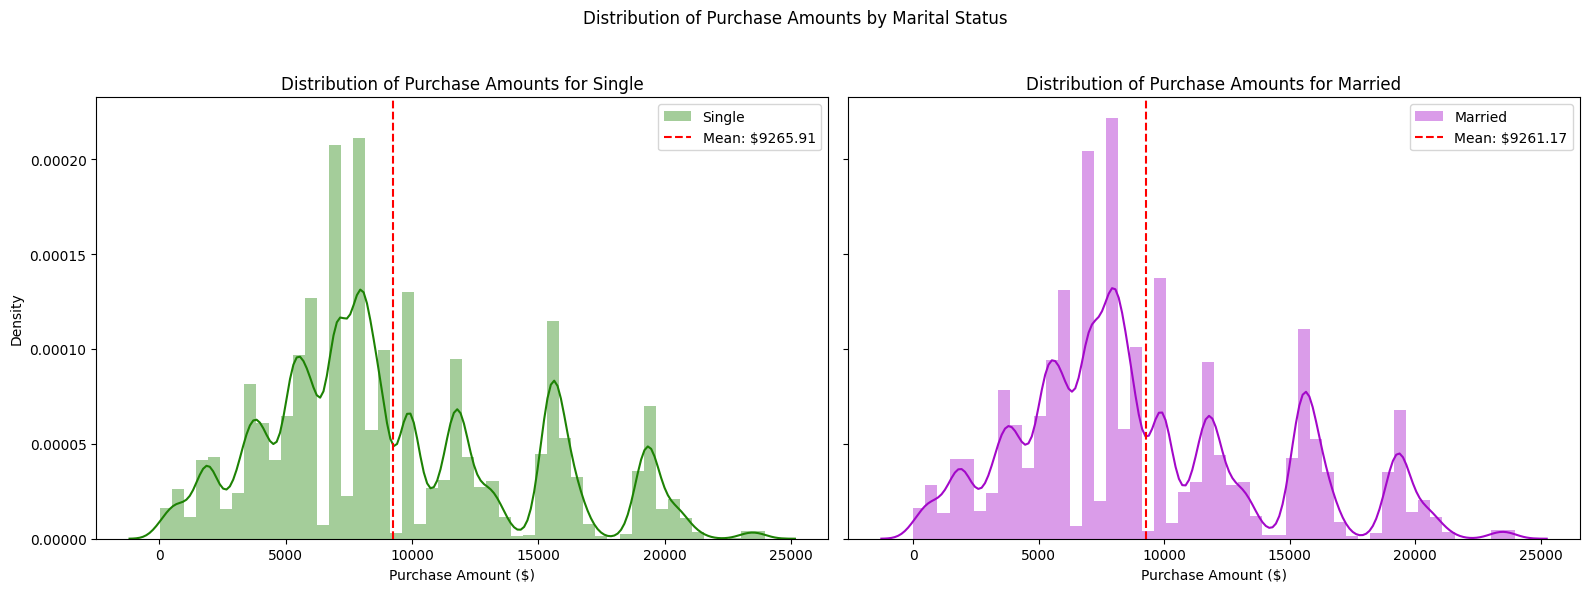

In [36]:
# Colors for each marital status
colors = {'Single': '#1d8204', 'Married': '#a308c9'}

# Creating a subplot for each marital status
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)  # sharey to keep y-axis scale the same for comparison

# Loop through the axes and plot
for ax, status in zip(axes, ['Single', 'Married']):
    subset = df[df['Marital_Status'] == status]['Purchase']
    mean_value = subset.mean()
    sns.distplot(subset, hist=True, kde=True, label=f'{status}', color=colors[status], ax=ax)
    ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: ${mean_value:.2f}')
    ax.set_title(f'Distribution of Purchase Amounts for {status}')
    ax.set_xlabel('Purchase Amount ($)')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Distribution of Purchase Amounts by Marital Status')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Insights of Distribution of Purchase Amounts by Marital Status**

###### **Average Spending Similarity**  
- Both **single** and **married individuals** have nearly identical average spending, around **$9260**, indicating no significant difference in spending per purchase between the two groups.

###### **Distinct Purchase Patterns**  
- **Singles:** Display a broader spread in purchase amounts with multiple small peaks, suggesting a **diverse range of spending habits**.  
- **Married Individuals:** Show sharper, higher peaks, indicating they may focus on **specific product types** or **higher-value items**.

###### **Higher Frequency of Lower Purchases for Singles**  
- Singles exhibit a higher density of purchases at **lower price points**, suggesting frequent but less expensive transactions, possibly aligned with **single-living necessities** or **discretionary spending**.

###### **Spikes in Higher Purchase Amounts for Married Individuals**  
- Married individuals demonstrate pronounced spikes at certain **high purchase values**, likely reflecting **big-ticket items** or **bulk buying** for family or household needs.

###### **Outliers and Extremes**  
- Both groups show potential for high expenditure, reaching up to **$25,000**.  
- Married individuals display more **consistency** in high-value spending, whereas singles show a more **erratic pattern**, indicating less predictability in high-end purchases.

These insights offer a deeper understanding of how **marital status** influences purchasing patterns, providing opportunities for **targeted marketing** and **sales strategies** tailored to each demographic's specific spending behaviors.



#### **1.3.1.2 What is the distribution of age groups among customers in different city categories?**

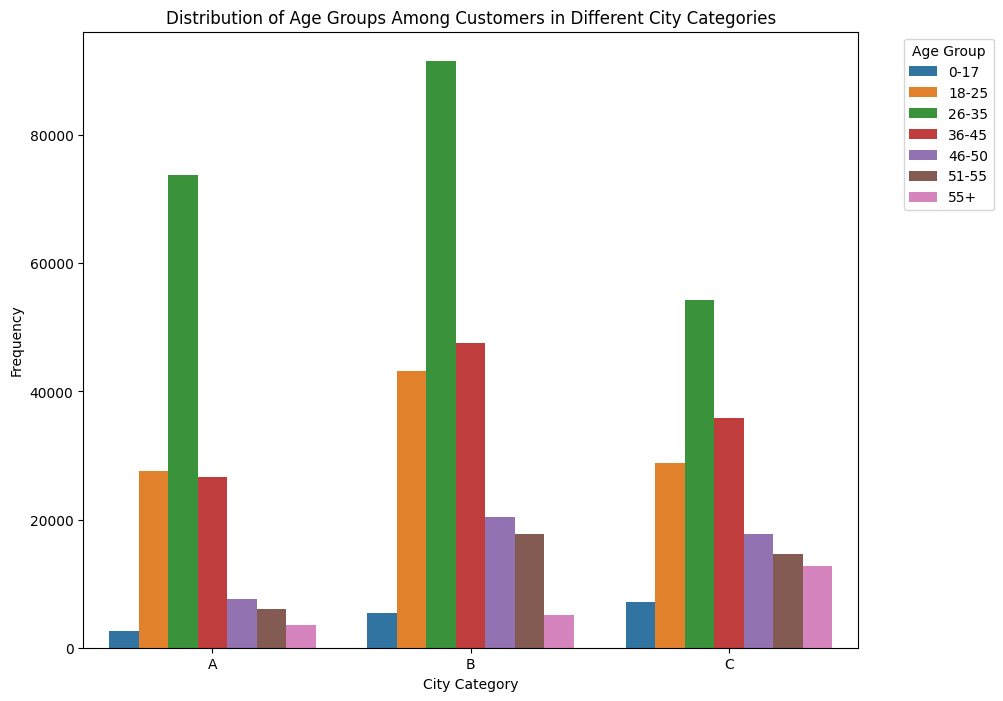

In [37]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 8))

# Creating a countplot using seaborn.
sns.countplot(x='City_Category', hue='Age', data=df, palette=sns.color_palette("tab10"),
              order=['A', 'B', 'C'], )

# Setting the title of the plot
plt.title('Distribution of Age Groups Among Customers in Different City Categories')
plt.xlabel('City Category') # Setting the x-axis label
plt.ylabel('Frequency') # Setting the y-axis label

# Configuring the legend, placing it outside the main plot area to avoid blocking any data
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()


#### **Insights of Distribution of Age Groups Among Customers in Different City Categories**

###### **City A's Young Adult Prevalence**  
- City A is dominated by the **26-35 age group**, suggesting it's a hub for **young professionals** and could benefit from products and services targeting this demographic.

###### **Diverse Age Range in City B**  
- City B shows a **balanced demographic mix**, making it ideal for businesses that offer a broad range of products or services to cater to **varied age-related preferences**.

###### **Youthful Population in City C**  
- The **18-35 age groups** are most prevalent in City C, indicating a **youthful city**, possibly with **educational institutions** or **new job opportunities** attracting younger residents.

###### **Limited Senior Representation**  
- Seniors **55+** are the least represented across all city categories, particularly in **City C**, suggesting these areas might not be as attractive to or populated by older adults.

###### **Targeted Marketing Opportunity in City B**  
- The **diverse age distribution** in City B offers a unique opportunity for **targeted marketing strategies** that cater to multiple age groups, from **young adults** to **middle-aged customers**.

These insights can help in tailoring **business strategies** and **marketing efforts** to align with the **demographic profiles** prevalent in each city category.


#### **1.3.1.3 How do purchase values vary between genders?**

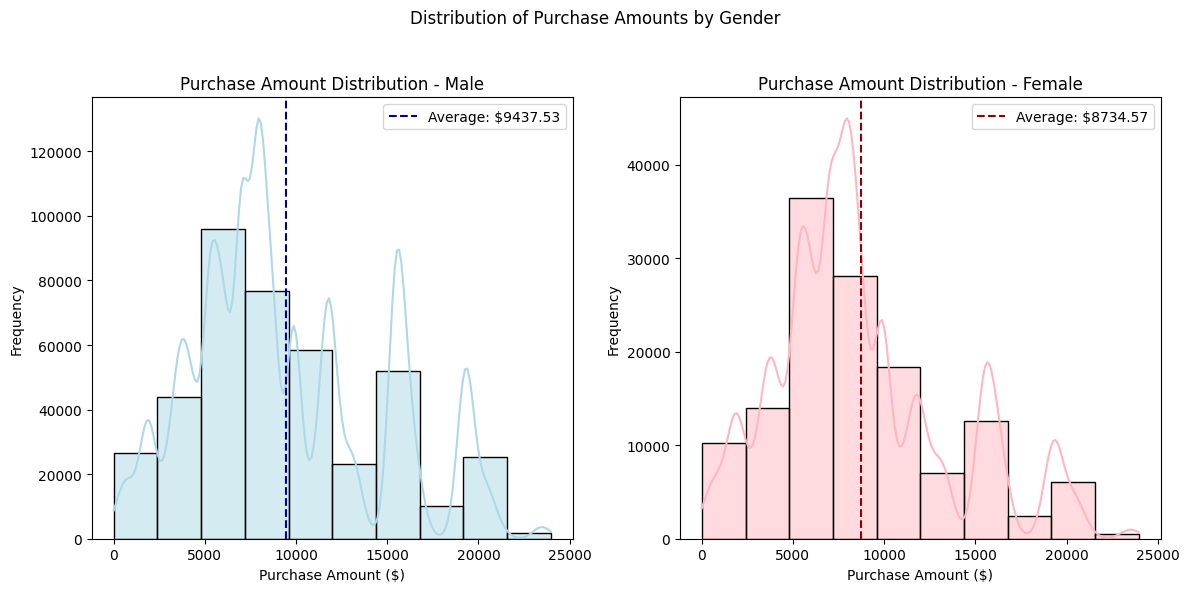

In [38]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting the histogram for male purchase data
male_data = df[df['Gender'] == 'Male']['Purchase']
sns.histplot(male_data, color='lightblue', kde=True, bins=10, ax=axes[0])
axes[0].set_title('Purchase Amount Distribution - Male')
axes[0].set_xlabel('Purchase Amount ($)')
axes[0].set_ylabel('Frequency')

# Determine the average purchase amount for males and add a visual marker
average_male_purchase = male_data.mean()
axes[0].axvline(average_male_purchase, color='darkblue', linestyle='--', label=f'Average: ${average_male_purchase:.2f}')
axes[0].legend()  # Display the legend to indicate what the line represents

# Plotting the histogram for female purchase data
female_data = df[df['Gender'] == 'Female']['Purchase']
sns.histplot(female_data, color='lightpink', kde=True, bins=10, ax=axes[1])
axes[1].set_title('Purchase Amount Distribution - Female')
axes[1].set_xlabel('Purchase Amount ($)')
axes[1].set_ylabel('Frequency')

# Determine the average purchase amount for females and add a visual marker
average_female_purchase = female_data.mean()
axes[1].axvline(average_female_purchase, color='darkred', linestyle='--', label=f'Average: ${average_female_purchase:.2f}')
axes[1].legend()  # Display the legend to indicate what the line represents

# Adding a super title for the entire plot
fig.suptitle('Distribution of Purchase Amounts by Gender')

# Adjust layout to prevent overlap of subplots and ensure clear visibility
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to fit the suptitle
# Display the entire plot
plt.show()


#### **Insights on Distribution of Purchase Amounts by Gender**

###### **Higher Spending by Males**  
- On average, **men spend more** per purchase (**\$9437.53**) compared to **women** (**\$8734.57**).  
- This may indicate that men are buying **more expensive items** or **larger quantities** at once.

###### **Broader Spending Range for Males**  
- Men's purchase amounts vary widely, with some **very high spending amounts** that are less common among women.  
- This suggests men's purchases are less consistent, possibly due to a **wider variety of products** being purchased.

###### **Common Spending Amounts for Females**  
- Women's purchases show **clear clustering** around specific amounts, indicating **popular pricing points** for the items they buy.  
- This may suggest women shop more for items priced within specific ranges, possibly influenced by **budgeting** or **product preference**.

###### **More Frequent Lower-Cost Purchases by Women**  
- Both genders often buy **less expensive items**, but this behavior is **slightly more frequent for women**.  
- This implies women may engage in **smaller, routine purchases** more often.

###### **High-Value Purchases for Both Genders**  
- Both genders make **expensive purchases**, although these are not the most common.  
- This indicates opportunities to target both men and women with **premium products**.

These insights highlight the **clear differences** in how men and women spend money, providing valuable information to tailor **marketing strategies** and **product offerings** effectively.


### **1.3.2	For categorical variable(s)**

#### **1.3.2.1 How does marital status influence purchase amounts based on the length of residence in the current city?**

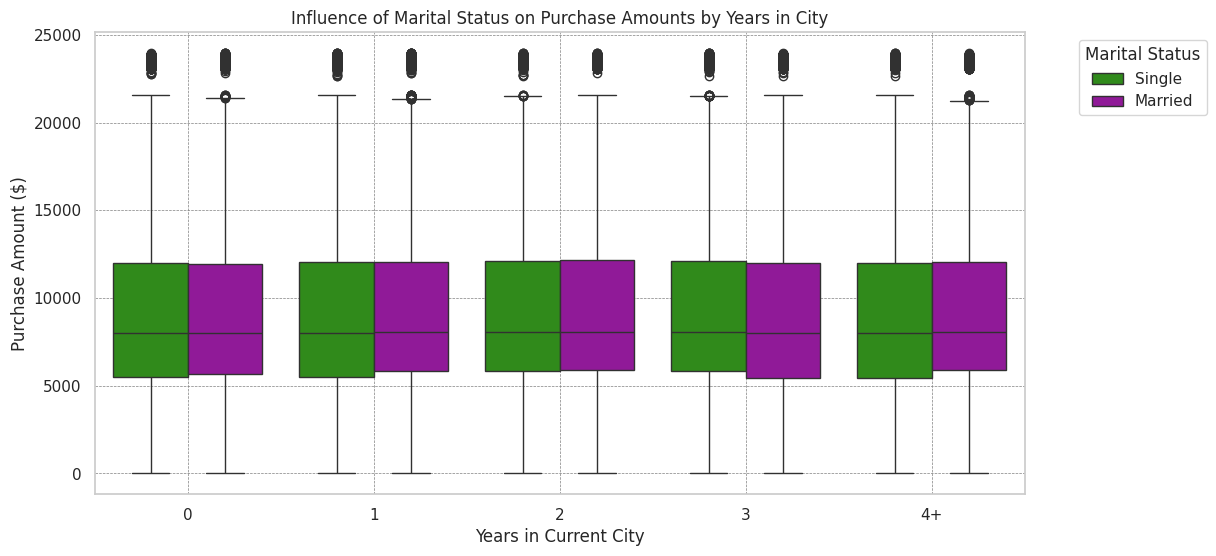

In [39]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Customize the matplotlib axes grid
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase',
                 hue='Marital_Status', data=df,
                 palette={'Single': '#259c08', 'Married': '#a205ad'})  # Custom colors for each marital status

# Adding titles and labels
plt.title('Influence of Marital Status on Purchase Amounts by Years in City')
plt.xlabel('Years in Current City')
plt.ylabel('Purchase Amount ($)')

# Customize the grid
plt.grid(True, linestyle='--', linewidth='0.5', color='gray')  # Dashed light gray grid for better visibility

# Configuring the legend, placing it outside the main plot area to avoid blocking any data
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

#### **Insights on Influence of Marital Status on Purchase Amounts by Years in City**

###### **Stable Spending Across Years**  
- Both **single** and **married individuals** tend to spend about the **same amount** regardless of how long they've lived in the city.  
- Spending habits remain **consistent over time** for all residents.

###### **Variable Spending by Married People**  
- Married residents show **more varied spending**, with **broader ranges** in the earlier years of residency.  
- This variability could reflect **family needs** or **financial decisions** typical of households.

###### **High Spending by Some Singles**  
- A few **single individuals** exhibit **high spending**, particularly after living in the city for a few years.  
- These high expenditures could be for **special** or **large purchases**.

###### **Uniform Spending Among Singles**  
- Single people generally demonstrate **similar spending habits**, shown by the **tighter grouping** of their spending amounts.  
- This suggests more **predictable spending patterns** among singles.

###### **Long-term Residence Doesn’t Change Spending**  
- Spending amounts do not significantly **increase** with longer residency in the city for either singles or married people.  
- **Length of residency** appears to have minimal influence on spending behaviors.

These insights provide a clear understanding of how **marital status** and **city residency duration** impact spending behaviors, allowing businesses to refine **customer engagement** and **marketing strategies** effectively.

#### **1.3.2.2 What are the top 10 product categories that are most popular among different occupational groups?**

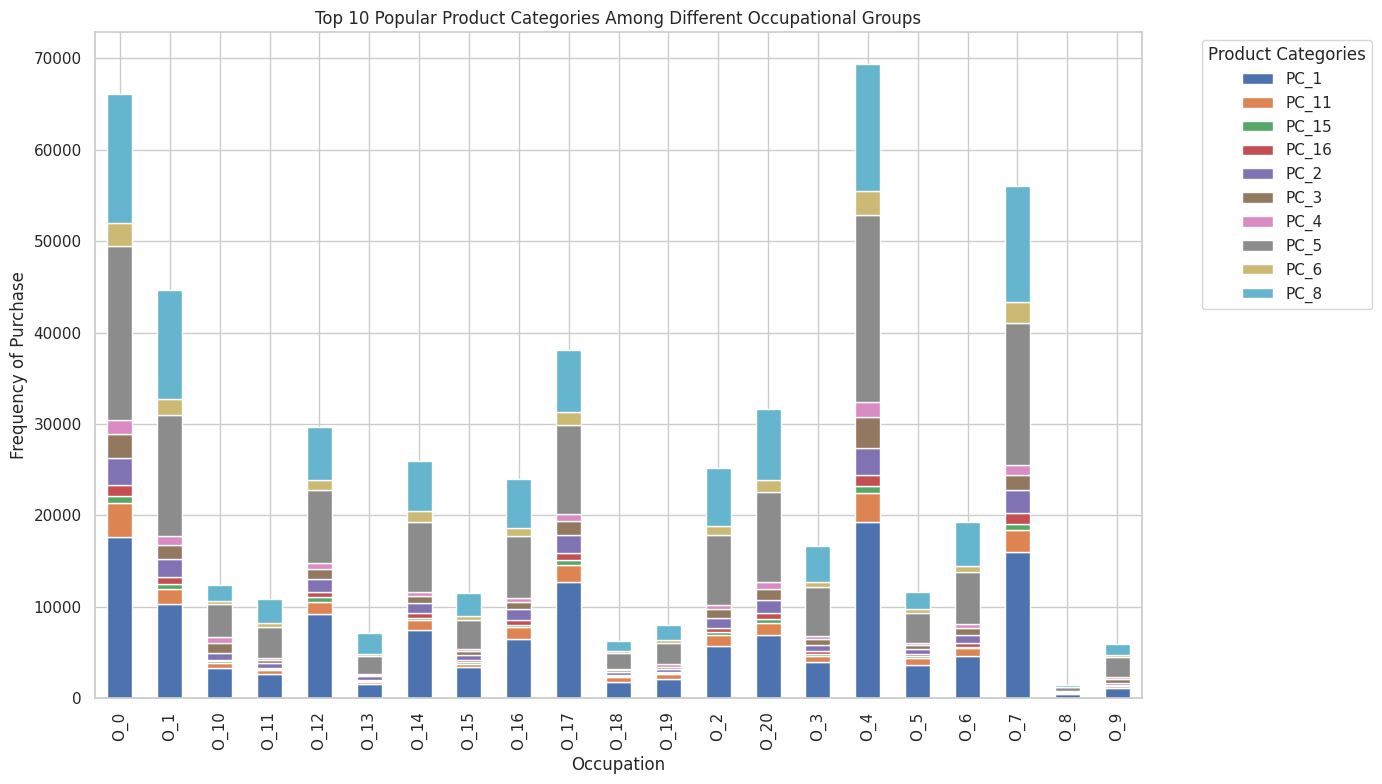

In [95]:
# Group the data by 'Occupation' and 'Product_Category' and count the number of occurrences
occupation_product_group = df.groupby(['Occupation', 'Product_Category']).size().reset_index(name='Count')

# Aggregate this data to find the total counts of each product category
total_product_counts = occupation_product_group.groupby('Product_Category')['Count'].sum()

# Sort the categories by total count and pick the top 10
top_10_categories = total_product_counts.sort_values(ascending=False).head(10).index

# Filter the original grouped data to only include these top 10 categories
top_categories_data = occupation_product_group[occupation_product_group['Product_Category'].isin(top_10_categories)]

# Pivot this data to get a matrix form where index is 'Occupation' and columns are 'Product_Category'
pivot_data = top_categories_data.pivot(index='Occupation', columns='Product_Category', values='Count').fillna(0)

# Plotting
ax = pivot_data.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Top 10 Popular Product Categories Among Different Occupational Groups')
plt.xlabel('Occupation')
plt.ylabel('Frequency of Purchase')
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

#### **Insights of Top 10 Popular Product Categories Among Different Occupational Groups**

###### **Diverse Preferences**  
- Different **occupational groups** exhibit varying preferences for **product categories**, highlighting the need for tailored product offerings.  

###### **Strategic Stocking**  
- Walmart should consider these preferences when stocking shelves, aligning inventory with the **occupational demographics** of each store's location.  

###### **Dominant Categories**  
- **PC_1** and **PC_5** are consistently popular across nearly all occupational groups, suggesting they include **essential** or **universally appealing products**.  

- **Focus Areas:** These categories could be central to **promotional campaigns** due to their **wide appeal**.  

###### **Specialized Interests**  
- Categories like **PC_11** and **PC_16**, while less prominent overall, show significant popularity within specific occupations such as **O_20**.  

- **Targeted Marketing:** This observation presents opportunities for **job-sector-specific marketing strategies** to increase engagement.  

###### **Moderate Favorites**  
- Categories **PC_3** and **PC_8** show considerable but varying interest across different occupations.  

- **Flexible Marketing Strategies:** Marketing for these categories may need to be more **adaptive** to the changing dynamics of customer occupation profiles.  

###### **Occupational Trends**  
- Occupations like **O_17** and **O_1** demonstrate a **broader distribution** of product category preferences, reflecting a **diverse consumer base**.  

- **Customized Promotions:** Walmart can create **customized promotions** that appeal to the **broad interests** of such occupational groups.  



These insights emphasize the importance of tailoring product offerings to the preferences of **different occupational groups**. By strategically aligning **promotions** and **inventory** with these preferences, Walmart can boost **customer satisfaction** and **sales performance**.


### **1.3.3	For correlation**

#### **1.3.3.1 What is the correlation between occupation, marital status, and the average purchase value in each product category?**

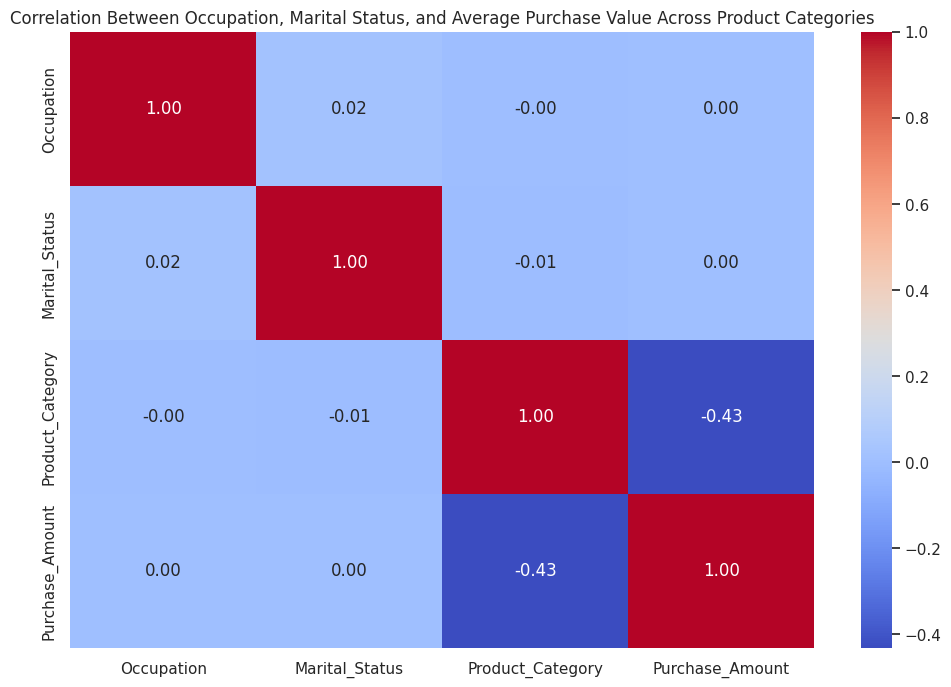

In [40]:
# Setting the aesthetic style of the plots
sns.set(style="white")

# Creating a copy of the DataFrame for modifications
df_encoded = df.copy()

# Encoding categorical data in the new DataFrame
df_encoded['Occupation'] = df_encoded['Occupation'].astype('category').cat.codes
df_encoded['Marital_Status'] = df_encoded['Marital_Status'].astype('category').cat.codes
df_encoded['Product_Category'] = df_encoded['Product_Category'].astype('category').cat.codes


df_encoded['Purchase_Amount'] = df['Purchase']

# Calculate correlation matrix on the encoded DataFrame
correlation_matrix = df_encoded[['Occupation', 'Marital_Status', 'Product_Category', 'Purchase_Amount']].corr()

# Create a heatmap to visualize the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Occupation, Marital Status, and Average Purchase Value Across Product Categories')
plt.show()

#### **Insights of Correlation Between Occupation, Marital Status, and Average Purchase Value Across Product Categories**

###### **Strong Self-Correlation**  
- Each variable shows a **perfect correlation** with itself (**1.00**) in the correlation matrix, as expected.  
- This serves as a **baseline check** for the accuracy of the matrix.

###### **Minimal Correlation Between Occupation and Other Factors**  
- The correlation between **occupation** and **marital status**, **product category**, and **purchase amount** is nearly **negligible**, all hovering around **0.00**.  
- Occupation alone does not significantly influence marital status, product preferences, or spending amounts.

###### **Low Influence of Marital Status**  
- **Marital status** shows very little correlation with **occupation** (**0.02**) and no correlation with **product category** or **purchase amount** (**0.00**).  
- Marital status appears largely **independent** of these factors in determining purchasing behavior.

###### **Negative Correlation Between Product Category and Purchase Amount**  
- A moderate **negative correlation** (**-0.43**) exists between **product category** and **purchase amount**.  
- This suggests that as product categories change, the **average purchase amount tends to vary inversely**, possibly due to **differing price ranges** across categories.

###### **Independence of Product Category from Occupation and Marital Status**  
- **Product category** shows virtually **no correlation** with **occupation** (**-0.00**) and **marital status** (**-0.01**).  
- Product choices may be influenced by other factors, such as **personal preferences** or **individual needs**, rather than these variables.

These insights highlight the **minimal impact** of occupation and marital status on purchasing behavior while emphasizing the **significant negative correlation** between product categories and purchase amounts, pointing to potential **pricing strategies** and product segmentation opportunities.


#### **1.3.3.2 How do occupation and marital status impact purchase amounts across different product categories?**

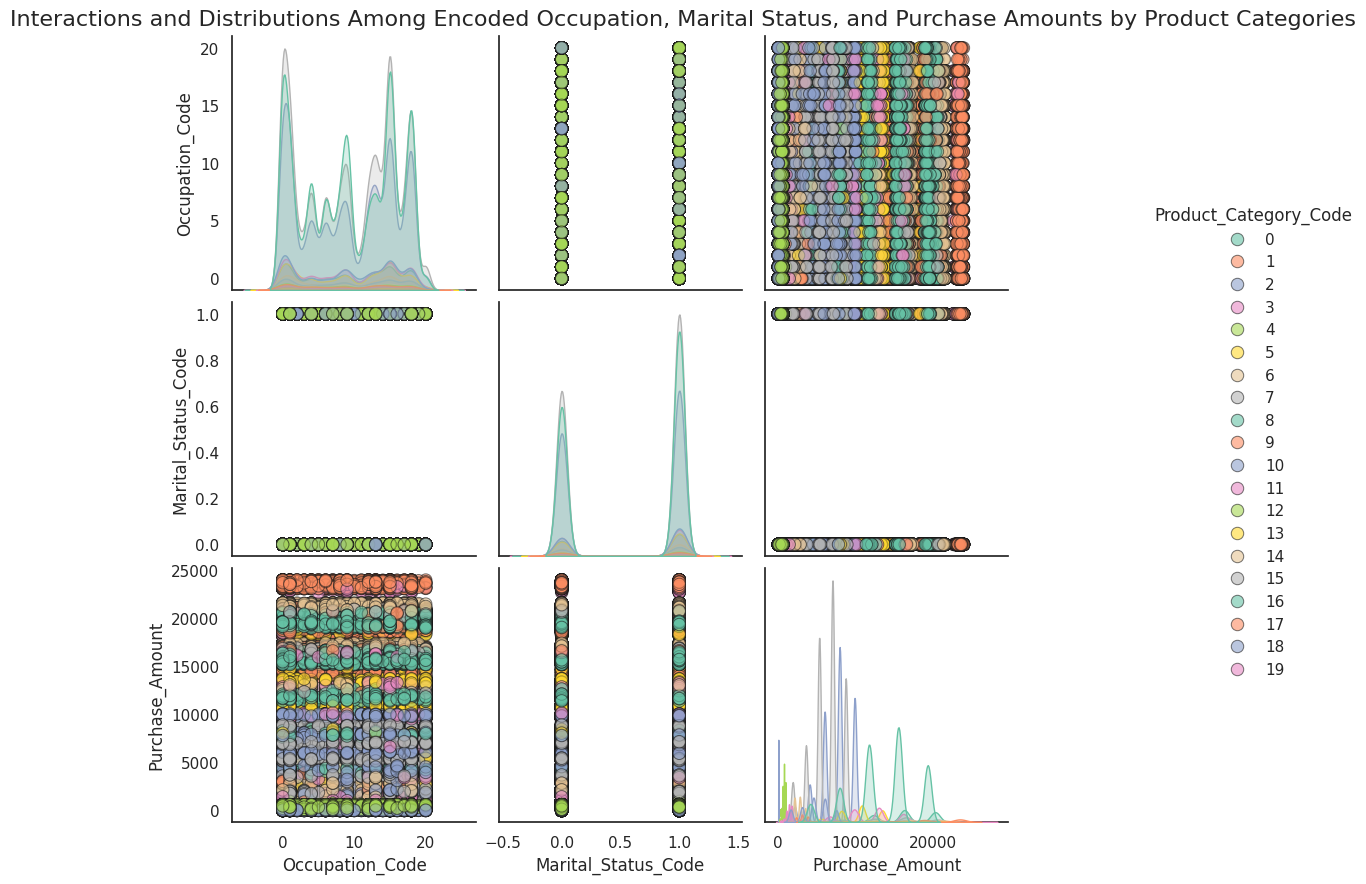

In [41]:
# Setting the aesthetic style of the plots
sns.set(style="white")

# Create a copy of the DataFrame for modifications
df_encoded = df.copy()

# Encode categorical data in the new DataFrame
df_encoded['Occupation_Code'] = df_encoded['Occupation'].astype('category').cat.codes
df_encoded['Marital_Status_Code'] = df_encoded['Marital_Status'].astype('category').cat.codes
df_encoded['Product_Category_Code'] = df_encoded['Product_Category'].astype('category').cat.codes

# Copy Purchase amounts directly without transformation
df_encoded['Purchase_Amount'] = df['Purchase']

# Create the pairplot using the encoded DataFrame
pairplot = sns.pairplot(df_encoded, vars=['Occupation_Code', 'Marital_Status_Code', 'Purchase_Amount'],
                        hue='Product_Category_Code',  # Use the encoded Product_Category as the hue for coloring
                        palette='Set2',  # Set a color palette
                        diag_kind='kde',  # Kernel density estimate plots for the diagonal
                        plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},  # Plot settings
                        height=3)

# Customize the plot to improve readability
pairplot.fig.suptitle('Interactions and Distributions Among Encoded Occupation, Marital Status, and Purchase Amounts by Product Categories', size=16)
pairplot.fig.subplots_adjust(top=0.95)  # Adjust the subplot params to fit the suptitle
plt.show()


#### **Insights of Interactions and Distributions Among Encoded Occupation, Marital Status, and Purchase Amounts by Product Categories**

###### **Variability in Purchase Amounts**  
- The plot of **purchase amounts** across different **occupation codes** reveals significant **variability** within certain occupations.  
- Some occupations show **wider ranges of spending**, indicating diverse purchasing behaviors or income levels within those groups.

###### **Concentration of Purchase Amounts**  
- Most purchase amounts are **concentrated at lower values** across all occupations, as shown by the density peaks near the lower segments of the purchase amount axis.  
- **Higher purchase amounts** are less frequent but occur across several occupations, possibly reflecting **occasional luxury or high-value purchases**.

###### **Distribution Consistency in Marital Status**  
- **Marital status codes** display consistent distributions with two clear peaks, likely corresponding to **single** and **married groups**.  
- This consistency suggests that marital status alone does not show wide variance in purchasing behavior.

###### **Interaction Between Product Category and Occupation**  
- Scatter plot grids of **product categories** and **occupation codes** reveal clusters in certain areas, highlighting **preferred product categories** within specific occupations.  
- These patterns may result from **lifestyle** or **income-related influences**.

###### **General Trends in Product Category Spending**  
- Product categories show **varying degrees of color intensity** across occupations, suggesting that some categories are more **universally preferred**, while others are more **niche**.  
- These insights can guide **targeted marketing strategies** and **product placement** to optimize sales for diverse occupational segments.

These findings provide a deeper understanding of how **occupation**, **marital status**, and **product categories** interact to shape purchasing patterns, enabling businesses to tailor their strategies to meet the specific needs and preferences of their customer base.

---

## **2. Missing Value & Outlier Detection**

#### Using df_raw for missing value & outlier detection

#### **2.1 Identifying Missing Values**

In [42]:
# Count missing values per column
missing_values = df_raw.isnull().sum()
missing_percentage = (df_raw.isnull().sum() / len(df)) * 100

# Combine the results into a single DataFrame for clarity
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print("Missing Values Summary:")
print(missing_data_df)


Missing Values Summary:
                            Missing Values  Percentage (%)
User_ID                                  0             0.0
Product_ID                               0             0.0
Gender                                   0             0.0
Age                                      0             0.0
Occupation                               0             0.0
City_Category                            0             0.0
Stay_In_Current_City_Years               0             0.0
Marital_Status                           0             0.0
Product_Category                         0             0.0
Purchase                                 0             0.0


#### **Insights on Missing Value Summary**

###### **Complete Data**  
- **High-Quality Data Collection:**  
  The dataset's complete lack of missing values across essential attributes like **User_ID**, **Product_ID**, and demographics highlights the **effectiveness of the data collection process**.  
- **No Need for Imputation:**  
  The thoroughness in data capture eliminates the need for **imputation strategies**, which can often complicate analysis or introduce biases.

###### **Ready for Analysis**  
- **Immediate Usability:**  
  The dataset's completeness in critical variables like **Purchase**, **Occupation**, and **Product_Category** makes it **ready for immediate use** in various analytical procedures.  
- **Broad Applicability:**  
  Analysts can begin applying **statistical methods**, **machine learning models**, or conducting **trend analysis** without spending time on preliminary data cleaning.

###### **Reliable Reporting and Decision Making**  
- **Comprehensive Insights:**  
  The complete dataset ensures that reports and insights reflect a **full view** of demographic and transactional behaviors, resulting in **accurate and comprehensive** findings.  
- **Enhanced Decision Support:**  
  The accuracy and completeness of key data points like **Age**, **Gender**, and **Purchase** improve the reliability of business intelligence outputs, supporting **more informed decision-making processes**.


#### **2.2 Detecting Outliers**

In [43]:
# Function to count and return the number of outliers in each column of a DataFrame
def count_outliers(df, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = column_outliers.shape[0]

    return outlier_counts

# Columns to check for outliers
columns = df_raw.select_dtypes(include='int64').columns

# Count outliers in specified columns
outlier_counts = count_outliers(df_raw, columns)

# Create a DataFrame to display the counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
print("Number of outliers detected in each column:")
print(outlier_counts_df)

Number of outliers detected in each column:
             Column  Outlier Count
0           User_ID              0
1        Occupation              0
2    Marital_Status              0
3  Product_Category           4153
4          Purchase           2677


The **User_ID**, **Occupation**, and **Marital_Status** columns have no detected **outliers**, indicating consistent and reliable data within these fields.

#### **2.3  Visualizing Outliers**

#### **Boxplot to Spot Outliers:**

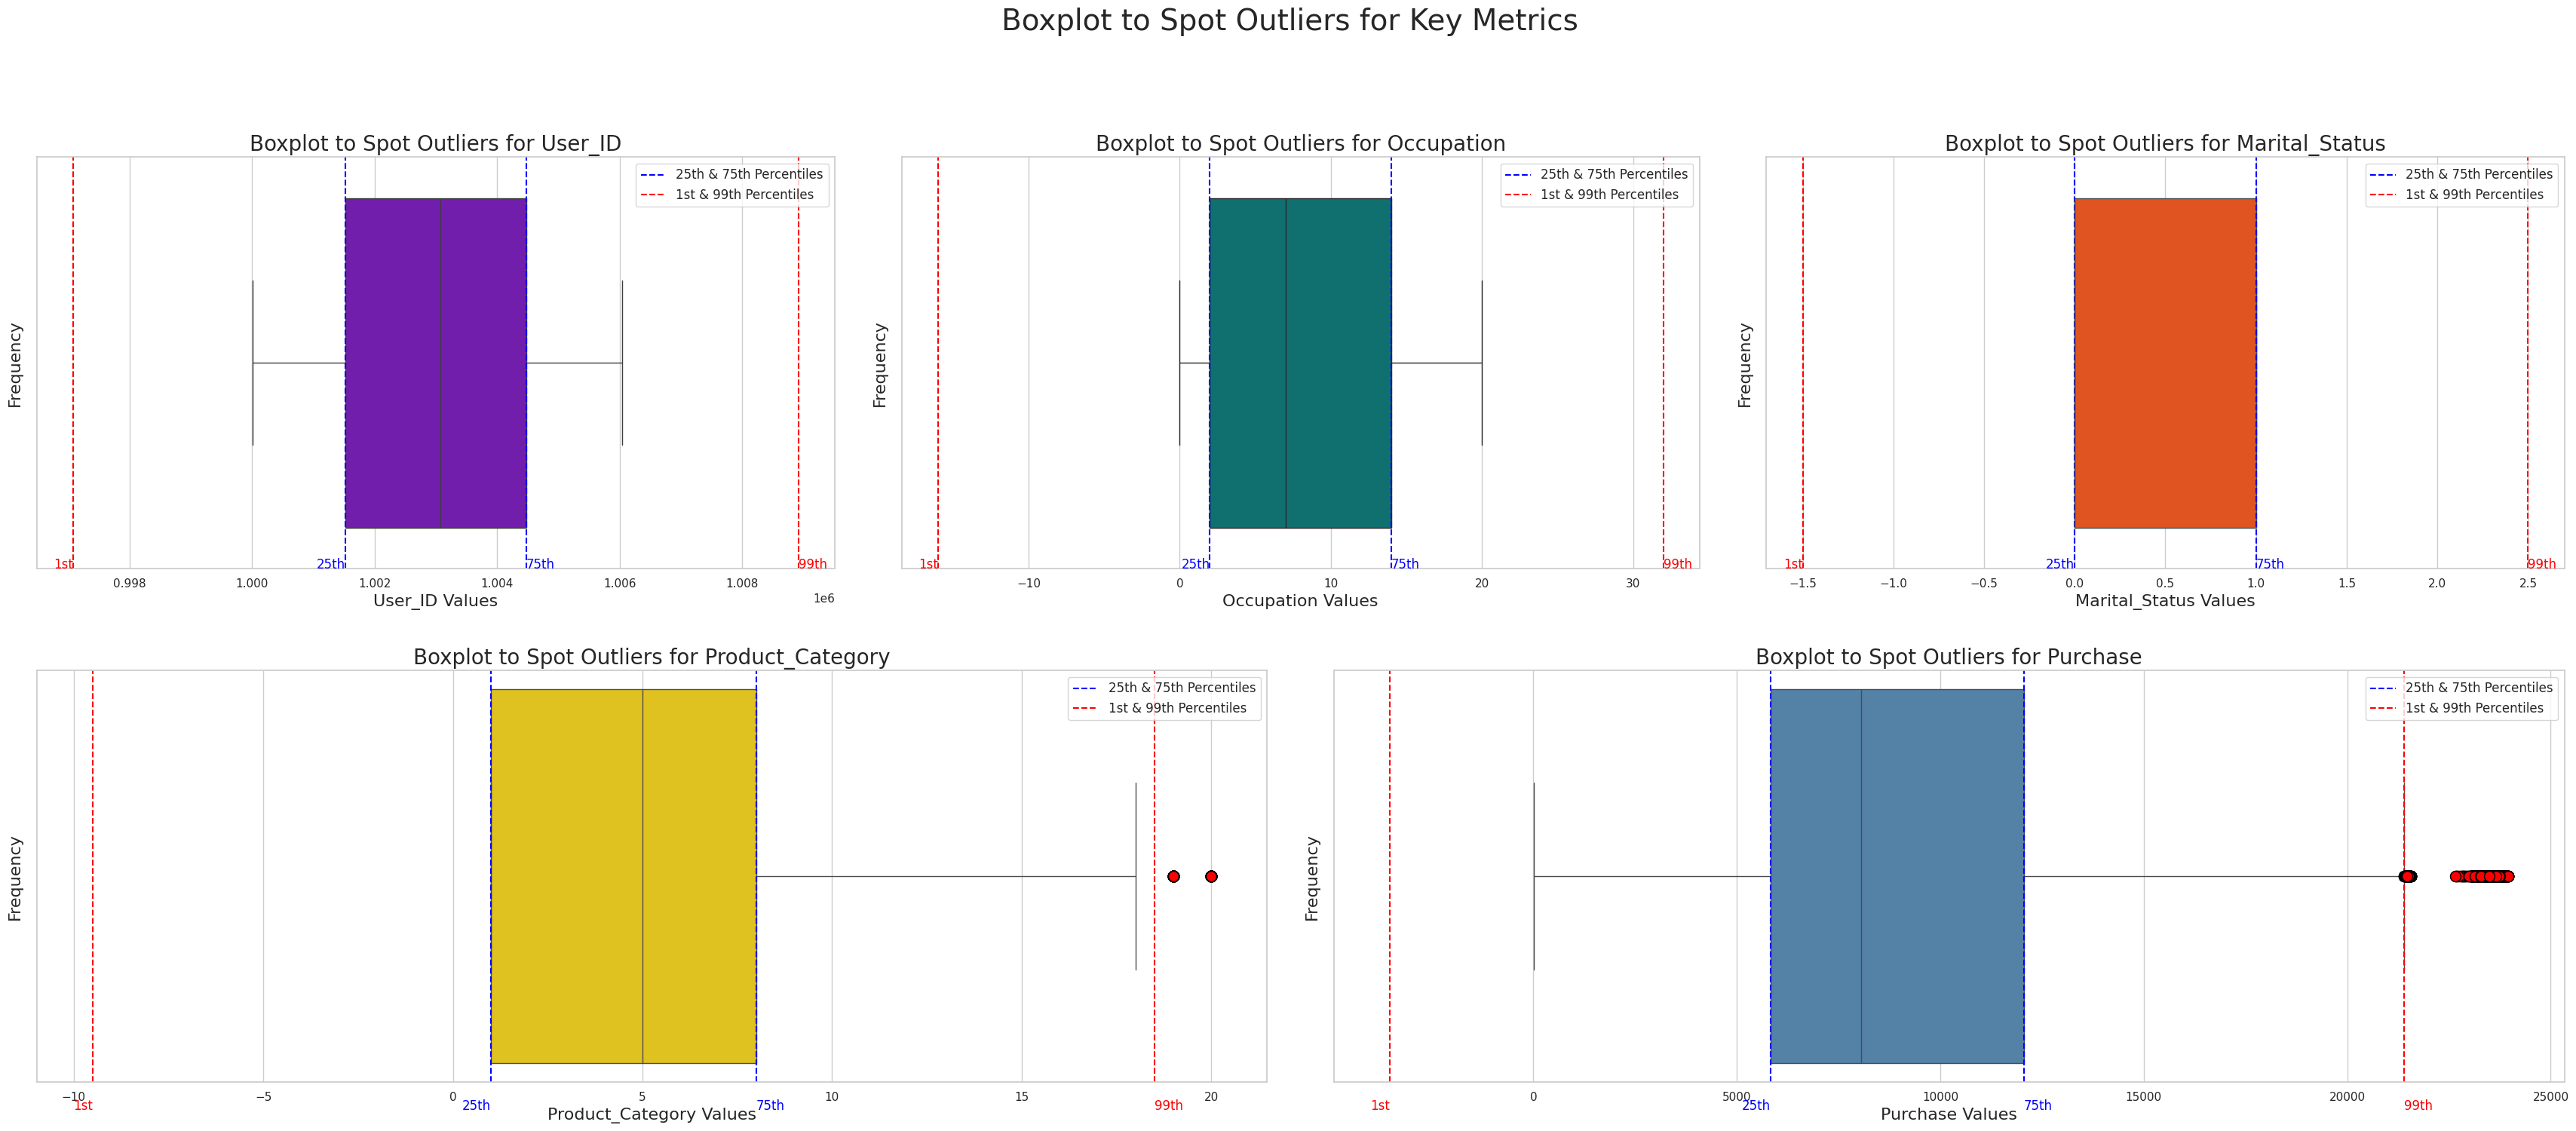

In [44]:
# Setup the figure and grid layout
sns.set(style="whitegrid")
fig = plt.figure(figsize=(35, 15))
gs = gridspec.GridSpec(2, 6)  # Define a grid with 2 rows and 6 columns

# Assign subplots to specific grid locations
ax1 = fig.add_subplot(gs[0, 0:2])  # First row, spans two of six columns
ax2 = fig.add_subplot(gs[0, 2:4])  # First row, spans the next two of six columns
ax3 = fig.add_subplot(gs[0, 4:6])  # First row, spans the last two of six columns
ax4 = fig.add_subplot(gs[1, 0:3])  # Second row, spans the first three of six columns
ax5 = fig.add_subplot(gs[1, 3:6])  # Second row, spans the last three of six columns
axes = [ax1, ax2, ax3, ax4, ax5]

# Define a custom color palette
custom_palette = ["#7506c4", "#008080", "#FF4500", "#FFD700", "#4682B4"]

# Loop through each column and plot on the designated axes
for i, col in enumerate(columns):
    if i < len(axes):  # Ensure the number of columns is within the range of defined axes
        sns.boxplot(x=df_raw[col], ax=axes[i], color=custom_palette[i], showfliers=False)
        Q1 = df_raw[col].quantile(0.25)
        Q3 = df_raw[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and highlight outliers with red circles
        outliers = df_raw[col][(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
        for outlier in outliers:
            axes[i].scatter(outlier, 0, color='red', s=100, edgecolor='black', zorder=5)

        # Set titles and labels with increased font size
        axes[i].set_title(f'Boxplot to Spot Outliers for {col}', fontsize=20)
        axes[i].set_xlabel(f'{col} Values', fontsize=16)
        axes[i].set_ylabel('Frequency', fontsize=16)

        # Labeling percentiles
        axes[i].axvline(x=Q1, color='blue', linestyle='--', label='25th & 75th Percentiles')
        axes[i].axvline(x=Q3, color='blue', linestyle='--')
        axes[i].text(Q1, 0.5, '25th', color='blue', ha='right')
        axes[i].text(Q3, 0.5, '75th', color='blue', ha='left')
        axes[i].axvline(x=lower_bound, color='red', linestyle='--', label='1st & 99th Percentiles')
        axes[i].axvline(x=upper_bound, color='red', linestyle='--')
        axes[i].text(lower_bound, 0.5, '1st', color='red', ha='right')
        axes[i].text(upper_bound, 0.5, '99th', color='red', ha='left')

        axes[i].legend(loc='upper right', fontsize=12)

# Set a descriptive suptitle
plt.suptitle('Boxplot to Spot Outliers for Key Metrics', fontsize=28, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()


#### **Insights of Boxplot to Spot Outliers for Key Metrics**

###### **User IDs are Uniform**  
- The **User_ID** boxplot shows no variation, indicating that all user IDs fall within a **tight range** without any outliers.  

###### **Occupational Diversity**  
- The occupation plot displays a **full spread** across its range, highlighting a **variety of occupational backgrounds** among users.  

###### **Marital Status Concentration**  
- The **Marital Status** boxplot indicates that data points are **concentrated**, suggesting that most users share a **similar marital status**.  

###### **Product Category Trends**  
- The **Product Category** boxplot highlights a few **categories as outliers**, reflecting **less frequent but significant purchases** in these categories.  

###### **Purchase Variability**  
- The **Purchase** boxplot shows a **wide range of spending behaviors** among users, with a few outliers making **significantly higher purchases**.  

###### **Clear Outlier Marking**  
- Outliers in the **Product Category** and **Purchase** boxplots are marked with **red dots**, making them easy to identify for further investigation.  

###### **Percentile Indicators**  
- **Blue and red lines** in the boxplots represent the **25th, 75th, 1st, and 99th percentiles**, providing a clear understanding of the distribution and range of values in each category.  

###### **Simple Visuals**  
- **Color distinction** between percentiles and the main boxplot area enables quick interpretation of the **spread** and **central tendencies** in the plots.  

###### **User ID Stability**  
- The **stability** in the User_ID plot suggests **uniformity in data** or that User_ID is not a variable with **meaningful variation**.  

###### **High-Value Purchases**  
- The **Purchase** plot's right-hand outliers (red dots) indicate **unusually high spending**, which could be analyzed further to understand **high-value customer behaviors**.  

These insights provide a comprehensive overview of how attributes such as **occupation**, **marital status**, **product category**, and **purchase amounts** distribute across the dataset, emphasizing **typical values** and **notable exceptions**.


#### **Distribution Plot to Confirm Outliers:**

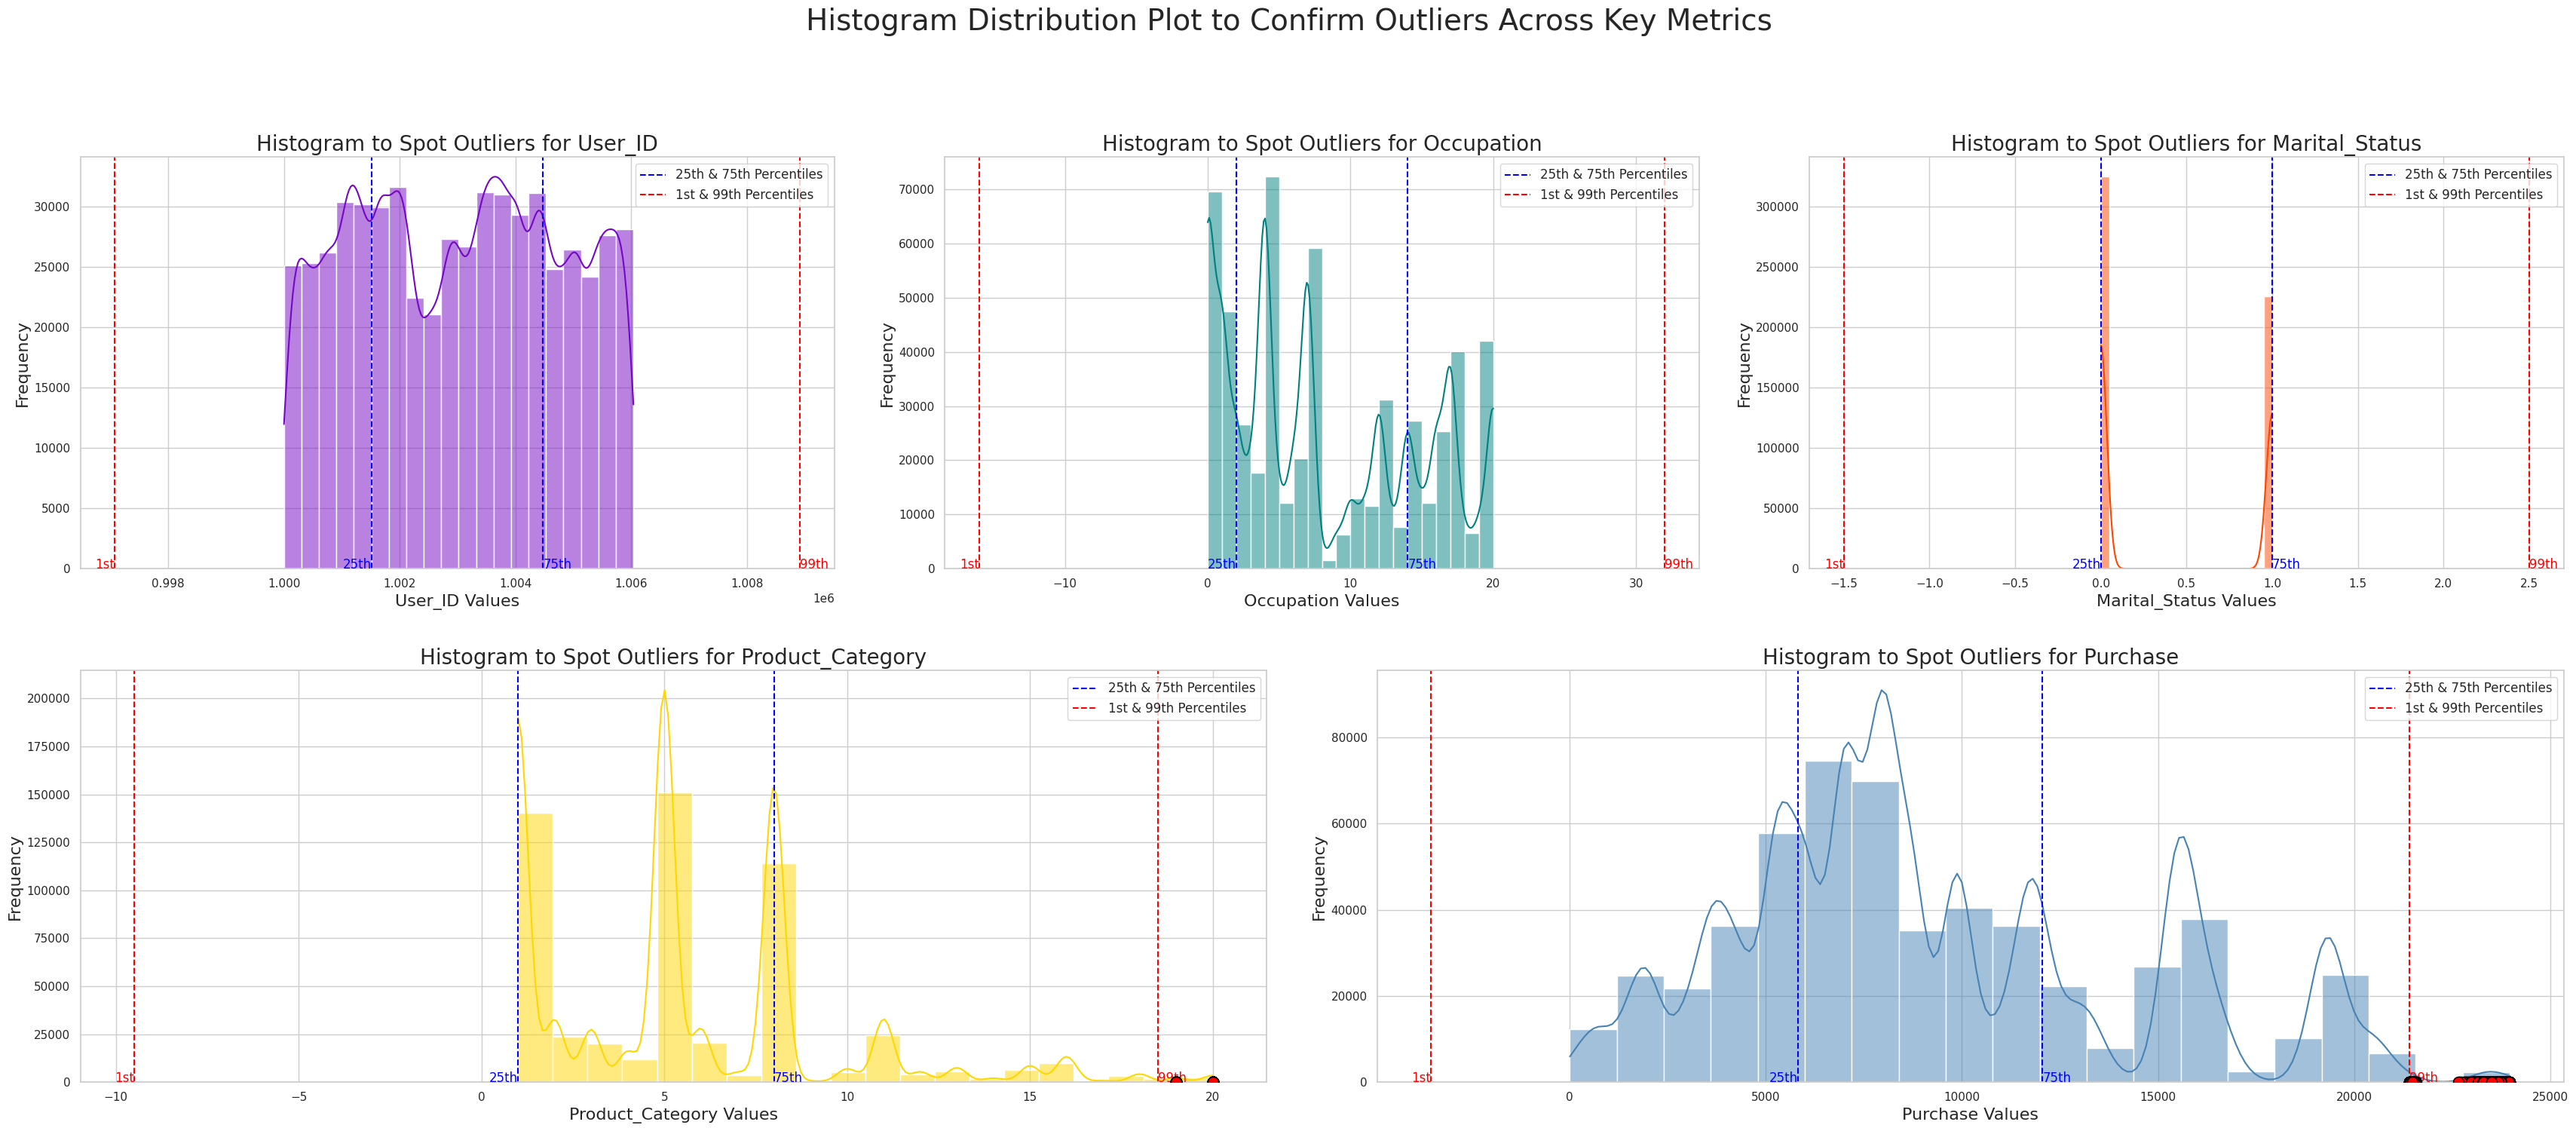

In [45]:
# Setup the figure and grid layout
sns.set(style="whitegrid")
fig = plt.figure(figsize=(35, 15))
gs = gridspec.GridSpec(2, 6)  # Define a grid with 2 rows and 6 columns

# Assign subplots to specific grid locations
ax1 = fig.add_subplot(gs[0, 0:2])  # First row, spans two of six columns
ax2 = fig.add_subplot(gs[0, 2:4])  # First row, spans the next two of six columns
ax3 = fig.add_subplot(gs[0, 4:6])  # First row, spans the last two of six columns
ax4 = fig.add_subplot(gs[1, 0:3])  # Second row, spans the first three of six columns
ax5 = fig.add_subplot(gs[1, 3:6])  # Second row, spans the last three of six columns
axes = [ax1, ax2, ax3, ax4, ax5]

# Define a custom color palette
custom_palette = ["#7506c4", "#008080", "#FF4500", "#FFD700", "#4682B4"]

# Loop through each column and plot on the designated axes
for i, col in enumerate(columns):
    if i < len(axes):  # Ensure the number of columns is within the range of defined axes
        sns.histplot(df_raw[col], kde=True, color=custom_palette[i], ax=axes[i], bins=20)
        Q1 = df_raw[col].quantile(0.25)
        Q3 = df_raw[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and highlight outliers with red circles
        outliers = df_raw[col][(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)]
        for outlier in outliers:
            axes[i].scatter(outlier, 0, color='red', s=100, edgecolor='black', zorder=5)

        # Set titles and labels with increased font size
        axes[i].set_title(f'Histogram to Spot Outliers for {col}', fontsize=20)
        axes[i].set_xlabel(f'{col} Values', fontsize=16)
        axes[i].set_ylabel('Frequency', fontsize=16)

        # Labeling percentiles
        axes[i].axvline(x=Q1, color='blue', linestyle='--', label='25th & 75th Percentiles')
        axes[i].axvline(x=Q3, color='blue', linestyle='--')
        axes[i].axvline(x=lower_bound, color='red', linestyle='--', label='1st & 99th Percentiles')
        axes[i].axvline(x=upper_bound, color='red', linestyle='--')
        axes[i].text(Q1, 0.5, '25th', color='blue', ha='right')
        axes[i].text(Q3, 0.5, '75th', color='blue', ha='left')
        axes[i].text(lower_bound, 0.5, '1st', color='red', ha='right')
        axes[i].text(upper_bound, 0.5, '99th', color='red', ha='left')

        axes[i].legend(loc='upper right', fontsize=12)

# Set a descriptive suptitle
plt.suptitle('Histogram Distribution Plot to Confirm Outliers Across Key Metrics', fontsize=28, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

#### **Insights on Distribution Plot to Confirm Outliers Across Key Metrics**

###### **User ID Uniformity**  
- The **User_ID** histogram shows a **uniform distribution**, indicating consistent user identification numbers without any outliers.  

###### **Occupational Variety**  
- The **Occupation** histogram reveals a **varied distribution** with no significant outliers, showcasing a **diverse range of occupation values** across the dataset.  

###### **Marital Status Binary**  
- The **Marital Status** histogram is sharply divided, reflecting the **binary nature** (likely **single** or **married**) of this categorical data.  

###### **Product Category Peaks**  
- The **Product Category** histogram exhibits sharp **peaks at specific categories**, with noticeable **outliers** in less common categories.  

###### **Purchase Patterns**  
- The **Purchase** histogram shows a **wide range** of values with **multiple peaks**, indicating diverse **buying behaviors** among users.  

###### **User ID Stability**  
- No outliers in the **User_ID** histogram suggest a **stable and sequential assignment** of ID numbers to users.  

###### **Outliers in Purchase**  
- Notable **high-value outliers** in the **Purchase** histogram signify **occasional large spending**.  

###### **Outlier Identification**  
- **Red dots** in the Product Category and Purchase histograms highlight **actual outlier values**, making them easy to identify for further investigation.  

###### **Percentile Marks**  
- **Red and blue dashed lines** mark the **1st, 25th, 75th, and 99th percentiles**, aiding in understanding **data distribution** and **potential outlier thresholds**.  

###### **Data Clarity**  
- The use of **color** and **dashed lines** in histograms enhances **interpretability**, clearly distinguishing between **regular data points** and **potential outliers**.  

These insights provide a comprehensive overview of data characteristics, focusing on **distribution**, **central tendencies**, and **variations**, while pinpointing anomalies and unusual data points. This analysis is essential for effective **data cleaning**, **analysis**, and **decision-making** based on the dataset's attributes.


---

## **3. Business Insights based on Non- Graphical and Visual Analysis**

#### **1. Comments on the Range of Attributes**

**a. User and Product Diversity:**  
- The dataset includes thousands of unique user and product IDs, reflecting Walmart's **extensive customer base** and **broad product variety**.  

**b. Purchase Amounts:**  
- Purchase values range widely, demonstrating Walmart's ability to cater to both **economical** and **luxury shopping preferences**.  

**c. Extensive Attribute Range:**  
- Attributes like **Age**, **Occupation**, and **City Category** exhibit diverse values, indicating Walmart's **varied demographic** and **geographical coverage**.  

</br>

#### **2. Comments on the Distribution of Variables and Their Relationships**   

**a. Gender Distribution:**  
- Predominantly male shoppers suggest that current marketing strategies may be more **male-oriented**.  
- This indicates an opportunity to **better target female customers** to balance the demographic engagement.  

**b. Age and Purchase Connection:**  
- Spending is concentrated in certain age groups, particularly **26-35**, suggesting the need for **life stage-specific marketing** strategies.  

**c. Occupation and Spending Correlation:**  
- Minimal correlation between **occupation and spending** implies that additional demographic and psychographic factors should be considered to **enhance predictive accuracy** in marketing strategies.  

</br>

#### **3. Comments for Each Univariate Plot**

**a. Gender Plot Analysis:**  
- **High volume of male customers:** Walmart could enhance **male-targeted inventory** and **promotions**.  
- **Potential growth in female engagement:** Strategies should focus on attracting and retaining female shoppers through **tailored product placements** and **custom promotions**.  

**b. Age Distribution Analysis:**  
- The prominence of the **26-35 age group** suggests an influence on **product selection** and **promotional focus**.  
- Walmart can expand focus on **underrepresented age groups** with **customized marketing campaigns** and product offers.  

</br>

#### **4. Comments for Each Bivariate Plot**  

**a. Gender vs. Purchase:**  
- Observations indicate that **men spend more per transaction**, suggesting an opportunity to focus marketing on **higher-value products** popular among male shoppers.  
- Investigating **female spending patterns** could help adjust product ranges and promotional tactics to **increase sales** from female customers.  

**b. Age vs. Purchase:**  
- Spending patterns vary across **age groups**, highlighting the need for **realigned promotional strategies** to cater to the specific needs and buying power of each age segment.  
- **Tailored marketing** for each age group can improve customer experience and spending.  

**c. Occupation vs. Product Category:**  
- Certain occupations demonstrate preferences for specific product categories, presenting opportunities for **targeted marketing** via **occupational discounts or promotions**.  
- Identifying less favored product categories might reveal new opportunities for **product development** or **marketing campaigns**.  


These insights provide Walmart with a **detailed understanding** of customer demographics and purchasing behaviors, supporting **informed decision-making** in:  
**1. Marketing strategies**  
**2. Product management**  
**3. Customer engagement**  

By leveraging these data-driven observations, Walmart can **optimize customer satisfaction** and **boost sales performance**.


---

## **4. Handling Queries**

#### **4.1  Are women spending more money per transaction than men? Why or Why not?**

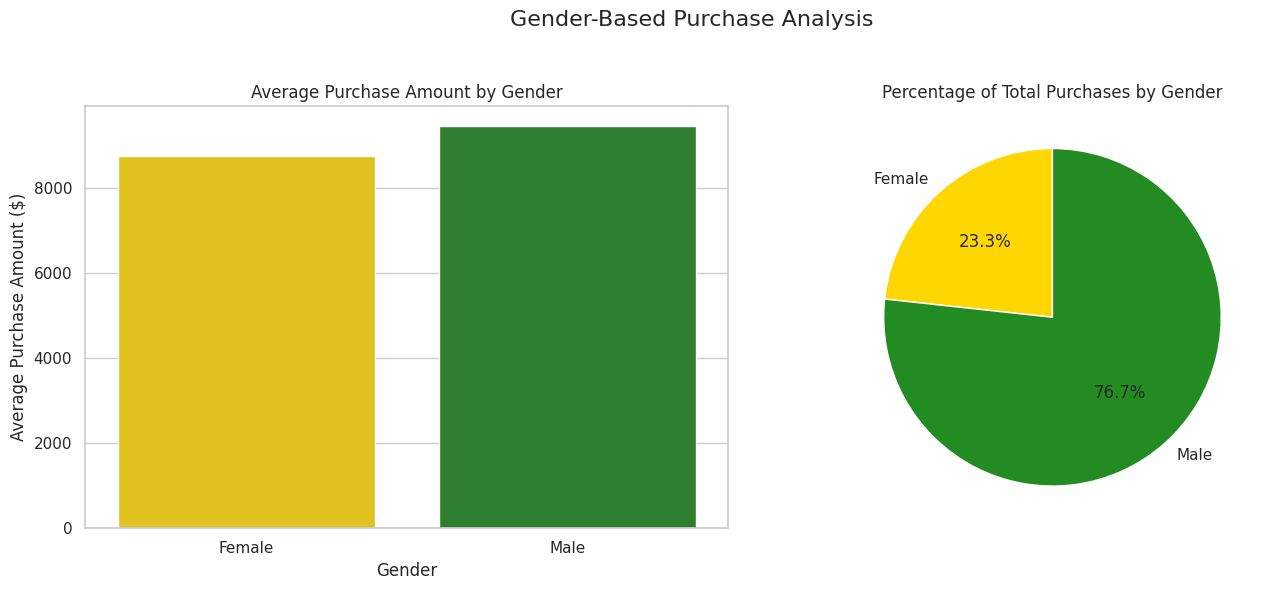

In [46]:
# Calculate the average purchase amount by gender
avg_purchase_by_gender = df.groupby('Gender')['Purchase'].mean().reset_index()

# Calculate the total purchase amount by gender
total_purchase_by_gender = df.groupby('Gender')['Purchase'].sum().reset_index()

# Calculate the percentage for the pie chart
total_purchase_by_gender['Percentage'] = (
    total_purchase_by_gender['Purchase'] / total_purchase_by_gender['Purchase'].sum() * 100
)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Add suptitle for the entire figure
fig.suptitle('Gender-Based Purchase Analysis', fontsize=16)

# Bar chart for average purchase amount by gender
sns.barplot(x='Gender', y='Purchase', data=avg_purchase_by_gender, ax=ax1, palette=['#FFD700', '#228B22'])
ax1.set_title('Average Purchase Amount by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Average Purchase Amount ($)')

# Pie chart for percentage of total purchases by gender
ax2.pie(
    total_purchase_by_gender['Percentage'],
    labels=total_purchase_by_gender['Gender'],
    autopct='%1.1f%%',
    colors=['#FFD700', '#228B22'],
    startangle=90
)
ax2.set_title('Percentage of Total Purchases by Gender')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit suptitle
plt.show()

#### **Insights on Gender-Based Spending Patterns and Opportunities**

###### **Higher Average Spending by Men**  
- Men spend **more per transaction**, as shown in the bar chart.  
- This suggests men are purchasing **higher-value items** or **spending in bulk**.  

###### **Men Dominate Total Purchases**  
- Men account for **76.7% of total purchases**, dominating overall spending.  
- This dominance may result from **more frequent purchases** or **larger transaction sizes**.  

###### **Lower Average Spending by Women**  
- Women spend **less per transaction** compared to men.  
- They may prioritize **smaller or lower-cost purchases**.

###### **Smaller Total Contribution by Women**  
- Women contribute only **23.3% of total purchases**, reflecting **less frequent transactions** or **smaller-scale spending**.  

###### **Opportunities for Retailers**  
- **Target Women:** Promotions can encourage **higher spending** from female customers.  
- **Engage Men:** Incentivize men with **loyalty programs** to sustain their spending habits.  


These insights highlight actionable strategies for **targeted marketing** and **customer engagement**, tailored to the unique spending patterns of men and women.


**Are women spending more money per transaction than men?**  
No, women are not spending more money per transaction than men.

**Why and Why Not :-**

**Why:**  
- Men likely purchase **higher-value** or **bulk items**, increasing their average transaction amount.  
- Men's product preferences, such as **electronics**, often have **higher price points**.  

**Why Not:**  
- Women tend to spend **less per transaction**, possibly focusing on **smaller** or **lower-cost items**.  
- Women's purchases might be more **need-based**, resulting in **lower average spending**.


#### **4.2 Confidence intervals and distribution of the mean of the expenses by female and male customers**

##### **Part 1: Histogram of Expenses by Gender**

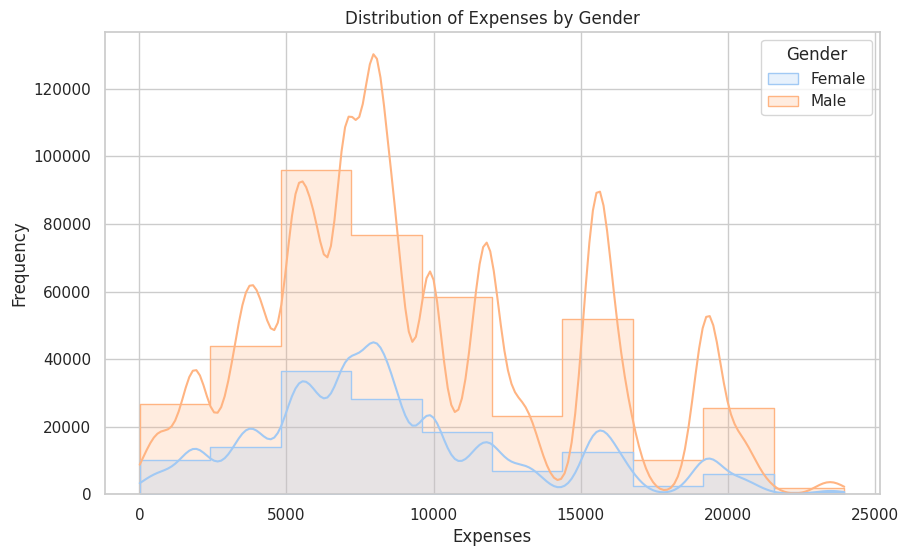

In [47]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of expenses by gender using seaborn
sns.histplot(df, x="Purchase", hue="Gender", kde=True, element='step', bins=10, palette="pastel")

# Add a title to the plot
plt.title('Distribution of Expenses by Gender')

# Label the x-axis
plt.xlabel('Expenses')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


##### **Part 2: Confidence Intervals for 90%, 95% and 99%**

Mean and Confidence Intervals for 90%, 95% and 99% :- 

Female:
 Mean Expense: 8734.57
 90% CI: (8713.29, 8755.84)
 95% CI: (8709.21, 8759.92)
 99% CI: (8701.24, 8767.89)
Male:
 Mean Expense: 9437.53
 90% CI: (9424.51, 9450.54)
 95% CI: (9422.02, 9453.03)
 99% CI: (9417.15, 9457.91)


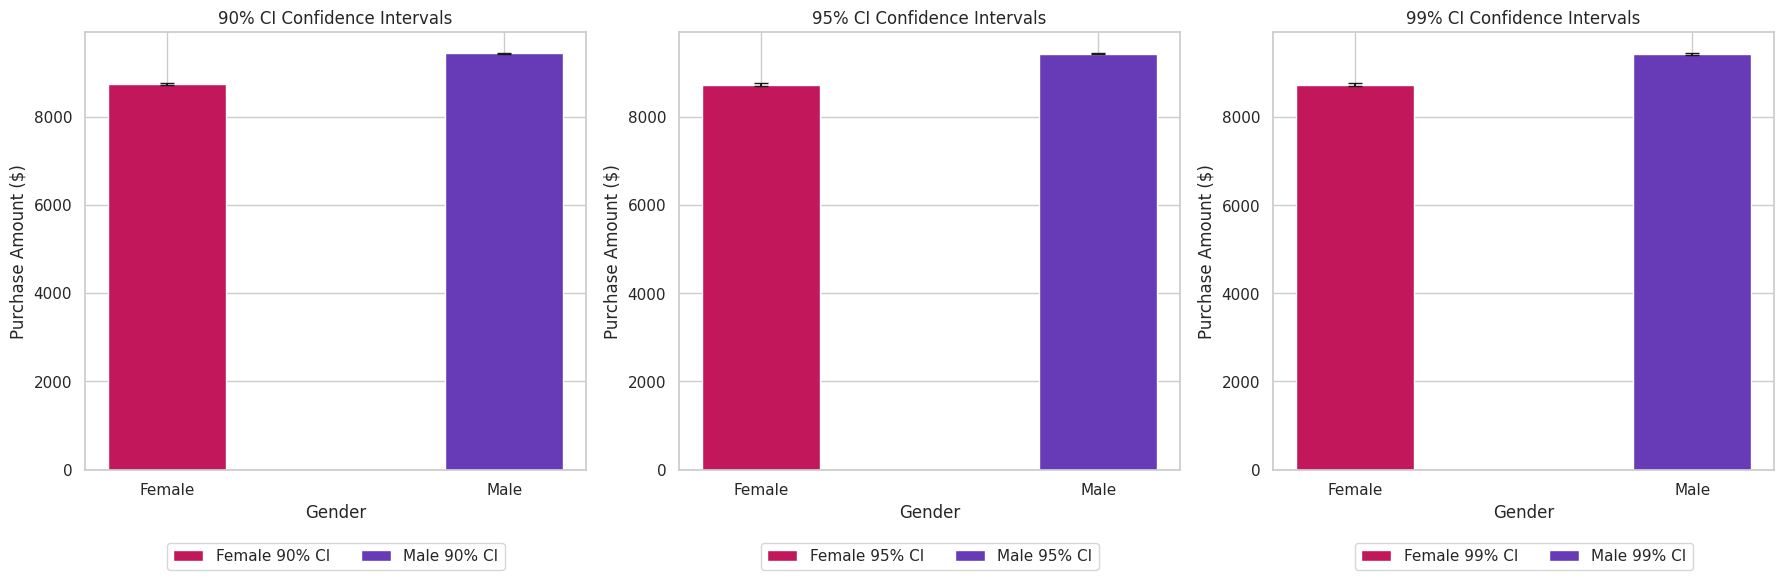

In [57]:
# Calculating mean and confidence intervals for each gender at 90%, 95%, and 99%
confidence_intervals = {}
genders = df['Gender'].unique()

# Define colors for Male and Female
colors = {'Male': '#673ab7', 'Female': '#c2185b'}  # Dark purple for male, Dark pink for female

for gender in genders:
    expenses = df[df['Gender'] == gender]['Purchase']
    mean_expense = np.mean(expenses)
    ci_90 = stats.t.interval(0.90, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    ci_95 = stats.t.interval(0.95, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    ci_99 = stats.t.interval(0.99, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    confidence_intervals[gender] = {
        "Mean": mean_expense,
        "90% CI": ci_90,
        "95% CI": ci_95,
        "99% CI": ci_99
    }

# Output the mean and confidence intervals for 90%, 95% and 99%

print("Mean and Confidence Intervals for 90%, 95% and 99% :- \n")

for gender, values in confidence_intervals.items():
  print(f"{gender}:")
  print(f" Mean Expense: {values['Mean']:.2f}")
  print(f" 90% CI: ({values['90% CI'][0]:.2f}, {values['90% CI'][1]:.2f})")
  print(f" 95% CI: ({values['95% CI'][0]:.2f}, {values['95% CI'][1]:.2f})")
  print(f" 99% CI: ({values['99% CI'][0]:.2f}, {values['99% CI'][1]:.2f})")

# Visualizing confidence intervals for 90%, 95%, and 99% in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
width = 0.35  # the width of the bars

for i, ci_level in enumerate(["90% CI", "95% CI", "99% CI"]):
    for j, gender in enumerate(genders):
        mean = confidence_intervals[gender]["Mean"]
        ci = confidence_intervals[gender][ci_level]
        error = [(mean - ci[0], ci[1] - mean)]
        axes[i].bar(j, mean, width, yerr=np.array(error).T, label=f'{gender} {ci_level}', color=colors[gender], capsize=5)
        axes[i].set_title(f'{ci_level} Confidence Intervals')
        axes[i].set_xticks(np.arange(len(genders)))
        axes[i].set_xticklabels(genders)
        axes[i].set_xlabel('Gender')
        axes[i].set_ylabel('Purchase Amount ($)')
        axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

#### **Insights on Distribution & Confidence Intervals of Expenses by Gender**

###### **Higher Average Spending by Men**  
- **Men's average spending** per transaction is higher, at **\$9437.53**, compared to women's **\$8734.57**, indicating a tendency to purchase **more expensive items** or **larger quantities** per transaction.  
- The **confidence intervals**, especially at 99% (**CI: \$9417.15 to \$9457.91 for men**), underline this higher spending with a significant level of **statistical confidence**.  

###### **Greater Variability in Male Spending**  
- The **broader range** for men’s 99% confidence interval compared to women’s (**Male: \$9417.15 - \$9457.91**, **Female: \$8701.24 - \$8767.89**) highlights a **greater variability** in their spending.  
- This suggests that men engage in both **high-end** and **low-end purchases** more frequently than women, presenting opportunities for **diverse product marketing**.  

###### **Consistent Spending by Women**  
- Women exhibit a **more consistent spending pattern**, with **tighter confidence intervals** across the 90%, 95%, and 99% levels, indicating **predictable consumer behavior**.  
- Retail strategies should leverage this **consistency** by offering promotions and stock levels that cater to **steady demand**.  

###### **Narrow Confidence Intervals for Women**  
- The **narrow range** of women’s confidence intervals (**90% CI: \$8713.29 - \$8755.84**) suggests less fluctuation in spending and greater **predictability**.  
- Marketing strategies can use these **tighter intervals** to accurately **predict spending patterns** and plan **inventory and promotions** effectively.  

###### **Wider Confidence Intervals for Men at Higher Confidence Levels**  
- The **significant widening** of men's confidence intervals at the **99% confidence level** indicates **uncertainty** and a **broader range of spending**, likely driven by **occasional large purchases**.  
- This fluctuation can be addressed by offering a **wide array of products and promotions** designed to cater to both **everyday needs** and **luxury items**.  



These detailed insights, equipped with **specific statistical measures**, can guide strategic decisions, helping businesses like Walmart **tailor their approach** to different consumer segments effectively, optimizing both **sales strategies** and **customer satisfaction**.


#### **4.3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

##### **Part 1: Are Confidence Intervals of Average Male and Female Spending Overlapping?**

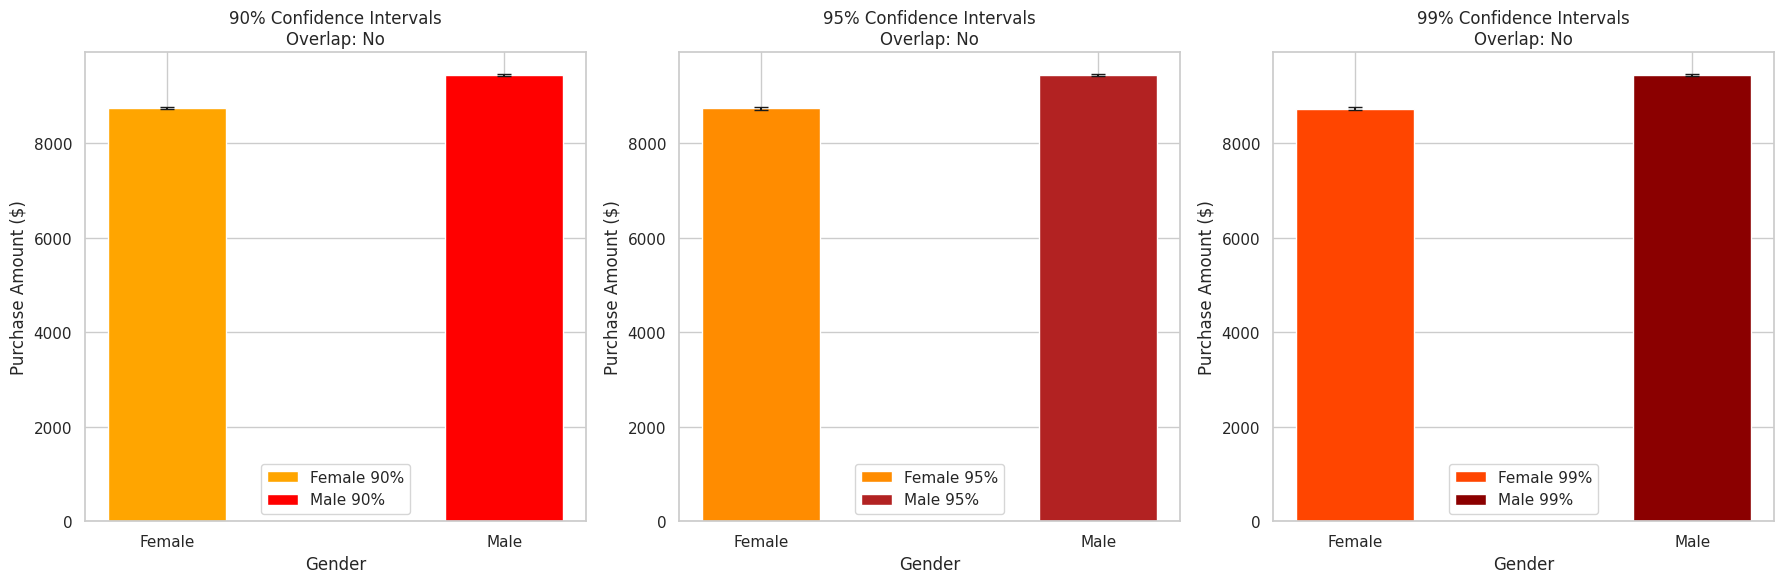

In [62]:
# Check overlap for 90%, 95%, and 99% CIs using the function
def check_ci_overlap(ci1, ci2):
    return not (ci1[1] < ci2[0] or ci2[1] < ci1[0])

# Extracting and computing overlaps for each confidence level
overlaps = {}
levels = ['90%', '95%', '99%']
for level in levels:
    overlaps[level] = check_ci_overlap(confidence_intervals['Female'][f"{level} CI"], confidence_intervals['Male'][f"{level} CI"])

# Visualization with updated colors for male and female
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
width = 0.35  # the width of the bars

# Define specific colors for male and female
colors_female = ['#FFA500', '#FF8C00', '#FF4500']  # Orange shades for 90%, 95%, 99%
colors_male = ['#FF0000', '#B22222', '#8B0000']  # Red shades for 90%, 95%, 99%

for i, level in enumerate(levels):
    for j, gender in enumerate(confidence_intervals.keys()):
        mean = confidence_intervals[gender]['Mean']
        ci = confidence_intervals[gender][f"{level} CI"]
        error = [(mean - ci[0], ci[1] - mean)]
        if gender == 'Female':
            color = colors_female[i]
        else:
            color = colors_male[i]
        axes[i].bar(j, mean, width, yerr=np.array(error).T, label=f'{gender} {level}', color=color, capsize=5)
        axes[i].set_title(f'{level} Confidence Intervals\nOverlap: {"Yes" if overlaps[level] else "No"}')
        axes[i].set_xticks(np.arange(len(confidence_intervals.keys())))
        axes[i].set_xticklabels(list(confidence_intervals.keys()))
        axes[i].set_xlabel('Gender')
        axes[i].set_ylabel('Purchase Amount ($)')
        axes[i].legend()

plt.tight_layout()
plt.show()


#### **Insights on Distinct Spending Behaviors and Strategic Opportunities**

###### **Distinct Spending Patterns**  
- The **non-overlapping confidence intervals** across various levels confirm **statistical differences** in spending between genders, highlighting **distinct purchase behaviors**.  
- These differences suggest that each gender prioritizes **different types of products or services**, shaping their overall spending patterns.  

###### **Product Differentiation Strategy**  
- The identified spending thresholds can guide the development of **gender-specific products** or adaptations that cater precisely to the **preferences** and **spending power** of each gender.  
- Customizing product offerings can enhance **user satisfaction** and potentially **increase per-customer spending**.  

###### **Targeted Marketing Campaigns**  
- Spending insights should inform **targeted marketing strategies** designed to address the **unique needs and desires** of each gender.  
- **Optimized messaging** and **channel selection** aligned with observed spending behaviors can improve **engagement** and **effectiveness**.  

###### **Dynamic Pricing Strategies**  
- Understanding distinct spending habits enables **dynamic pricing strategies** that reflect the **willingness to pay** of each gender.  
- Strategically adjust prices to:  
  - Entice **higher spending** from males on premium products.  
  - Offer **budget-friendly options** to females, maximizing profitability across segments.  

###### **Optimized Inventory Management**  
- Align **inventory and store layouts** with spending patterns:  
  - Place **high-value items** in zones preferred by males.  
  - Position **accessible, budget-friendly items** in areas frequented by females.  
- This tailored approach enhances **operational efficiency** and increases purchase likelihood by meeting **specific expectations** of each gender.  


These insights underscore the importance of adopting **gender-specific strategies** in **product development**, **marketing**, **pricing**, and **inventory management**. Such alignment with distinct spending behaviors can drive **customer satisfaction**, **boost sales**, and improve **market penetration**.

##### **Part 2: How Can Walmart Leverage This Conclusion?**

###### **Product Strategy**  
- **Diversified Inventory:** Expand the range of products tailored to **male preferences**, especially in **higher-value categories** where men tend to spend more.  
- **Customized Product Lines:** Develop and introduce new product lines that cater to the **distinct tastes** and **needs of female shoppers**, aiming to increase their **average spending**.  
- **Seasonal and Trend-Based Offerings:** Adjust product offerings based on **seasonal trends** and ongoing **consumer behavior analysis** to maintain engagement from both male and female shoppers.  

###### **Marketing and Advertising**  
- **Gender-Focused Campaigns:** Launch campaigns specifically targeting male and female customers with tailored **messages** that resonate with their **shopping behaviors and preferences**.  
- **Influencer Partnerships:** Collaborate with **influencers** who appeal to each gender to expand reach and influence **purchasing decisions**.  
- **Promotional Events:** Host **gender-specific promotional events** that cater to shopping habits, such as **men’s tech day** or **women’s wellness weekends**.  

###### **Pricing Strategy**  
- **Dynamic Pricing Models:** Use data-driven insights to implement **dynamic pricing strategies**, maximizing revenue based on purchasing habits of different genders.  
- **Bundling Products:** Create **bundle offers** combining **high-value items** favored by men with **frequently purchased products** by women to increase transaction value.  
- **Discount Offers:** Tailor discounts to encourage **higher spending by women**, such as percentage discounts on bulk purchases or higher-priced items.  

###### **Store Layout and Experience**  
- **Store Design Optimization:** Redesign store layouts for easier navigation to sections or products that attract **male** and **female shoppers**, improving the shopping experience.  
- **Interactive Displays:** Implement **interactive displays** in sections popular with men, using technology to engage them and drive higher sales.  
- **Enhanced Customer Service:** Train staff to better understand and assist with the specific **shopping preferences** of male and female customers.  

###### **Digital and Technological Enhancements**  
- **Personalized Online Shopping:** Enhance the e-commerce platform to offer **personalized shopping experiences** based on gender-specific buying habits, leveraging **data analytics** for recommendations.  
- **Mobile App Features:** Develop app features catering to different genders, such as **wallet-friendly options** for women and **tech gadget updates** for men.  
- **Augmented Reality:** Integrate **augmented reality (AR)** features into the Walmart app, allowing customers to **visualize products** in their home environment before purchasing. This appeals to **tech-savvy men** and **detail-oriented women**.  


By implementing these strategies, Walmart can address **gender-specific spending differences** while enhancing **engagement** and **satisfaction** for all customers. These approaches have the potential to increase **average spending per transaction** and foster **long-term loyalty**.

#### **4.4 Results when the same activity is performed for Married vs Unmarried**

##### **Part 1: Histogram of Expenses by Marital Status**

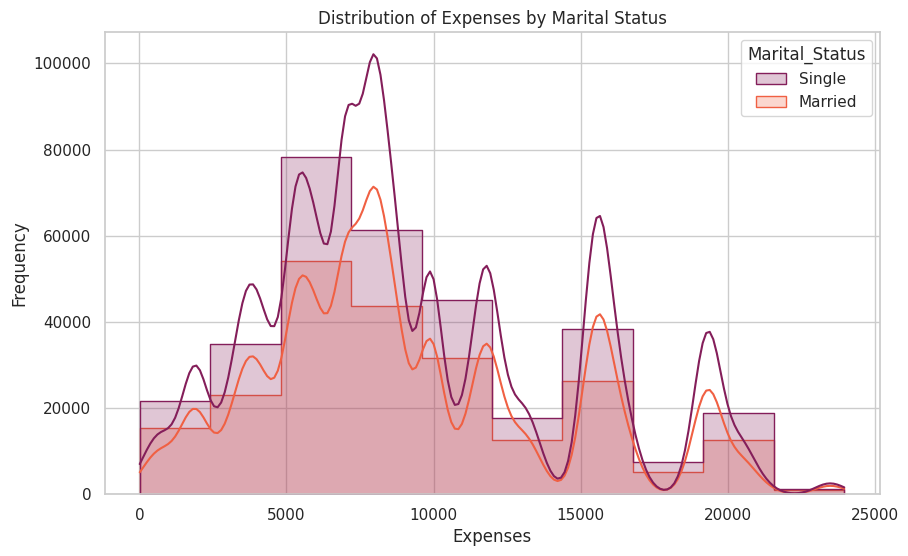

In [68]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of expenses by marital status using seaborn
sns.histplot(df, x="Purchase", hue="Marital_Status", kde=True, element='step', bins=10, palette="rocket")

# Add a title to the plot
plt.title('Distribution of Expenses by Marital Status')

# Label the x-axis
plt.xlabel('Expenses')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


##### **Part 2: Evaluating Confidence Intervals and Checking Overlap in Spending by Marital Status**

Mean and Confidence Intervals for 90%, 95% and 99% by Marital Status:

Single:
 Mean Expense: 9265.91
 90% CI: (9251.40, 9280.42)
 95% CI: (9248.62, 9283.20)
 99% CI: (9243.18, 9288.63)

Married:
 Mean Expense: 9261.17
 90% CI: (9243.79, 9278.56)
 95% CI: (9240.46, 9281.89)
 99% CI: (9233.95, 9288.40)



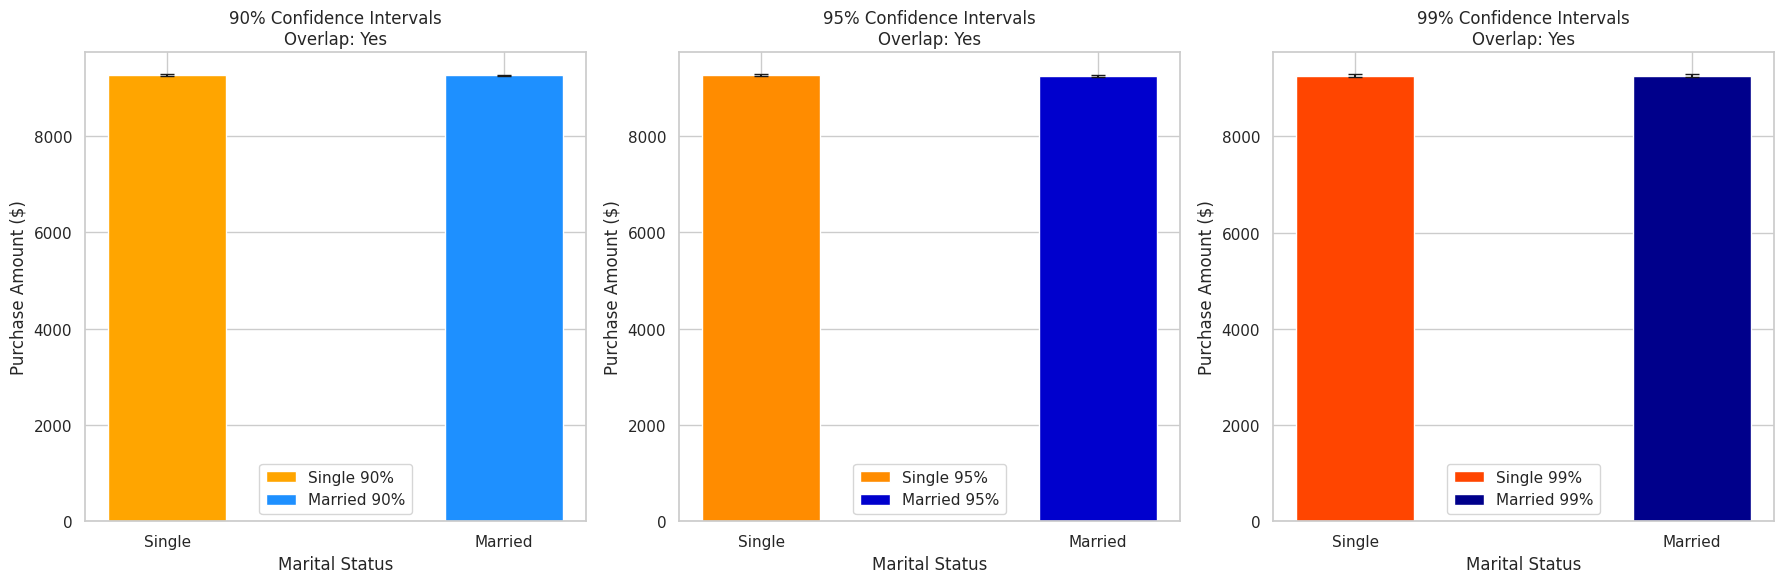

In [69]:
# Calculating mean and confidence intervals for each marital status at 90%, 95%, and 99%
confidence_intervals = {}
statuses = df['Marital_Status'].unique()

# Define colors for Single and Married
colors = {'Single': '#FF4500', 'Married': '#1E90FF'}  # Orange for single, Blue for married

for status in statuses:
    expenses = df[df['Marital_Status'] == status]['Purchase']
    mean_expense = np.mean(expenses)
    ci_90 = stats.t.interval(0.90, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    ci_95 = stats.t.interval(0.95, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    ci_99 = stats.t.interval(0.99, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    confidence_intervals[status] = {
        "Mean": mean_expense,
        "90% CI": ci_90,
        "95% CI": ci_95,
        "99% CI": ci_99
    }

# Output the mean and confidence intervals for 90%, 95% and 99%
print("Mean and Confidence Intervals for 90%, 95% and 99% by Marital Status:\n")
for status, values in confidence_intervals.items():
    print(f"{status}:")
    print(f" Mean Expense: {values['Mean']:.2f}")
    print(f" 90% CI: ({values['90% CI'][0]:.2f}, {values['90% CI'][1]:.2f})")
    print(f" 95% CI: ({values['95% CI'][0]:.2f}, {values['95% CI'][1]:.2f})")
    print(f" 99% CI: ({values['99% CI'][0]:.2f}, {values['99% CI'][1]:.2f})\n")

# Check overlap for 90%, 95%, and 99% CIs using the function
def check_ci_overlap(ci1, ci2):
    return not (ci1[1] < ci2[0] or ci2[1] < ci1[0])

# Extracting and computing overlaps for each confidence level
overlaps = {}
levels = ['90%', '95%', '99%']
for level in levels:
    overlaps[level] = check_ci_overlap(confidence_intervals['Single'][f"{level} CI"], confidence_intervals.get('Married', {'Mean': 0, f"{level} CI": (0,0)})[f"{level} CI"])

# Visualization with updated colors for Single and Married
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
width = 0.35  # the width of the bars

colors_single = ['#FFA500', '#FF8C00', '#FF4500']  # Orange shades for 90%, 95%, 99%
colors_married = ['#1E90FF', '#0000CD', '#00008B']  # Blue shades for 90%, 95%, 99%

for i, level in enumerate(levels):
    for j, status in enumerate(confidence_intervals.keys()):
        mean = confidence_intervals[status]['Mean']
        ci = confidence_intervals[status][f"{level} CI"]
        error = [(mean - ci[0], ci[1] - mean)]
        if status == 'Single':
            color = colors_single[i]
        else:
            color = colors_married[i]
        axes[i].bar(j, mean, width, yerr=np.array(error).T, label=f'{status} {level}', color=color, capsize=5)
        axes[i].set_title(f'{level} Confidence Intervals\nOverlap: {"Yes" if overlaps[level] else "No"}')
        axes[i].set_xticks(np.arange(len(confidence_intervals.keys())))
        axes[i].set_xticklabels(list(confidence_intervals.keys()))
        axes[i].set_xlabel('Marital Status')
        axes[i].set_ylabel('Purchase Amount ($)')
        axes[i].legend()

plt.tight_layout()
plt.show()

#### **Insights on Spending Patterns by Marital Status and Strategic Recommendations**

**Similar Spending Levels:**  
Both single and married individuals have nearly identical mean expenses around **\$9,261 to \$9,265**, suggesting similar purchasing power or preferences.  

- **Overlap in Confidence Intervals:**  
  The overlapping confidence intervals at **90%**, **95%**, and **99%** indicate no significant difference in spending habits between singles and married individuals.  

**Tight Confidence Intervals:**  
The confidence intervals are tight for both groups across all levels, which shows that the data points are closely clustered around the mean.  

- **Consistent Spending Behavior:**  
  This tight clustering suggests that spending behaviors are consistent within each group, whether single or married.  

**Strategic Pricing:**  
With overlapping spending ranges, Walmart can streamline pricing strategies to cater uniformly to both singles and married individuals without specific adjustments.  

- **Uniform Marketing Approach:**  
  Since spending behaviors are similar, marketing campaigns can broadly target both demographics without customization.  

**Product Placement and Promotions:**  
Given the similar spending patterns, Walmart might not need separate sections or promotions specifically tailored to marital status.  

- **Efficient Inventory Management:**  
  Inventory can be managed more efficiently with a unified approach that caters to the general population rather than segmenting stock by marital status.  

**Customer Loyalty Programs:**  
Loyalty programs can be designed to reward spending behaviors that are common to both singles and married customers, encouraging repeat business.  

- **Incentives Based on Spending Not Marital Status:**  
  Incentives can focus on spending thresholds and shopping frequency, rather than marital status, to foster customer loyalty.  


These insights help in understanding that despite marital differences, spending habits might not vary significantly, allowing for a more **streamlined approach** in business strategies.


##### **Part 3: How Can Walmart Leverage This Conclusion?**

###### **Unified Marketing Campaigns**  
- **a. Broad Audience Reach:** Target both single and married individuals with the same campaigns to maximize reach and impact.  
- **b. Cost Efficiency:** Save on marketing costs by avoiding separate campaigns for singles and married customers.  
- **c. Consistent Messaging:** Use uniform messaging that resonates with shared values and interests across both demographics.  

###### **Inventory and Stocking Strategies**  
- **a. Simplified Stock Management:** Stock products that are universally appealing to both singles and married customers to simplify inventory.  
- **b. Focus on Bestsellers:** Prioritize stocking bestselling items that cater to general needs rather than marital status-specific products.  
- **c. Seasonal Adjustments:** Adjust stock levels based on general consumer behavior trends rather than marital status.  

###### **Pricing Strategies**  
- **a. Uniform Pricing Models:** Implement pricing strategies that are attractive to all customers, reflecting the universal spending power indicated by the overlap in confidence intervals.  
- **b. Volume Discounts:** Offer discounts based on purchase volume rather than demographic-specific promotions.  
- **c. Dynamic Pricing:** Use dynamic pricing to attract more customers during peak shopping times regardless of their marital status.  

###### **Loyalty Programs and Incentives**  
- **a. Inclusive Loyalty Rewards:** Design loyalty programs that reward points based on spending levels, appealing to both singles and married customers.  
- **b. Cross-Promotions:** Create cross-promotions that encourage higher spending and frequent visits without distinguishing marital status.  
- **c. Customizable Rewards:** Offer customizable reward options that cater to individual preferences, appealing to a broader customer base.  

###### **Store Layout and Design**  
- **a. Universal Appeal Sections:** Design store layouts that are universally appealing, with sections that do not segregate by family size or marital status.  
- **b. Mixed Product Placement:** Place complementary products next to each other to encourage impulse buys among all customers.  
- **c. Enhanced Shopping Experience:** Create a shopping experience that focuses on **convenience** and **accessibility** for everyone, making the store attractive to both singles and married individuals.  



By implementing these strategies, Walmart can effectively cater to a **broader audience**, enhance **customer satisfaction**, and increase **sales** across various customer segments.

#### **4.5 Results when the same activity is performed for Age**

##### **Part 1: Distribution of Expenses by Age Group**

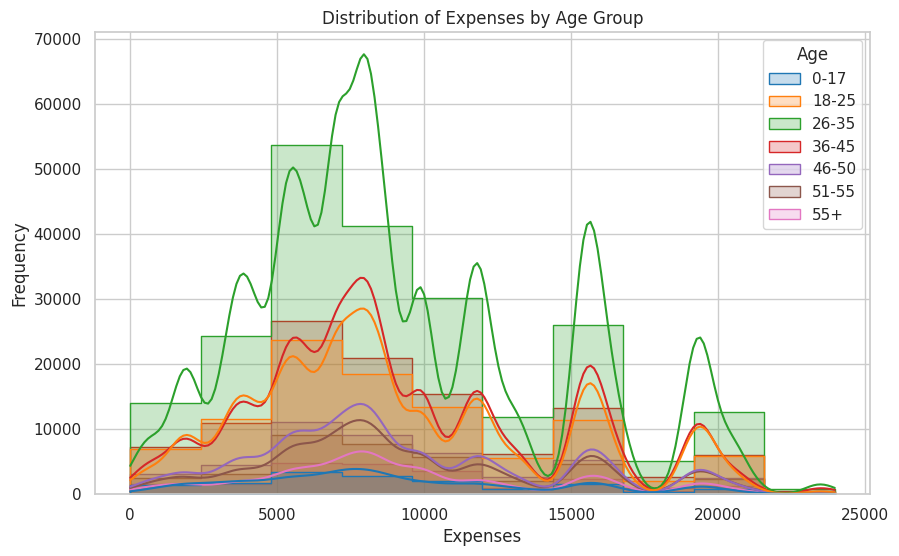

In [72]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of expenses by age group using seaborn
sns.histplot(df, x="Purchase", hue="Age", kde=True, element='step', bins=10, palette="tab10")

# Add a title to the plot
plt.title('Distribution of Expenses by Age Group')

# Label the x-axis
plt.xlabel('Expenses')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

##### **Part 2: Evaluating Confidence Intervals and Overlap in Age Group Spending**

In [81]:
# Calculating mean and confidence intervals for each age group at 90%, 95%, and 99%
confidence_intervals = {}
age_groups = df['Age'].unique()

# Define colors using the tab10 palette
tab10 = cm.get_cmap('tab10', len(age_groups))
colors = {age_group: tab10(i) for i, age_group in enumerate(age_groups)}

for age_group in age_groups:
    expenses = df[df['Age'] == age_group]['Purchase']
    mean_expense = np.mean(expenses)
    ci_90 = stats.t.interval(0.90, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    ci_95 = stats.t.interval(0.95, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    ci_99 = stats.t.interval(0.99, df=len(expenses)-1, loc=mean_expense, scale=stats.sem(expenses))
    confidence_intervals[age_group] = {
        "Mean": mean_expense,
        "90% CI": ci_90,
        "95% CI": ci_95,
        "99% CI": ci_99
    }

# Convert dictionary to DataFrame
df_conf_intervals = pd.DataFrame.from_dict(confidence_intervals, orient='index')
print("Mean and Confidence Intervals for 90%, 95%, and 99% by Age Group:\n")
print(df_conf_intervals)

Mean and Confidence Intervals for 90%, 95%, and 99% by Age Group:

              Mean                                  90% CI  \
0-17   8933.464640    (8865.049497531349, 9001.8797833586)   
55+    9336.280459  (9280.065285868366, 9392.495633030443)   
26-35  9252.690633  (9235.102926382391, 9270.278339357385)   
46-50  9208.625697  (9170.406084331049, 9246.845310605606)   
51-55  9534.808031  (9492.160404787175, 9577.455657133296)   
36-45  9331.350695   (9306.441166444858, 9356.26022339089)   
18-25  9169.663606    (9143.432787777778, 9195.8944247448)   

                                       95% CI  \
0-17   (8851.941436361221, 9014.987844528727)   
55+    (9269.295063935433, 9403.265854963376)   
26-35  (9231.733560884022, 9273.647704855754)   
46-50   (9163.08393647555, 9254.167458461105)   
51-55  (9483.989875153999, 9585.626186766473)   
36-45  (9301.669084404875, 9361.032305430872)   
18-25   (9138.40756914702, 9200.919643375557)   

                                       99% 

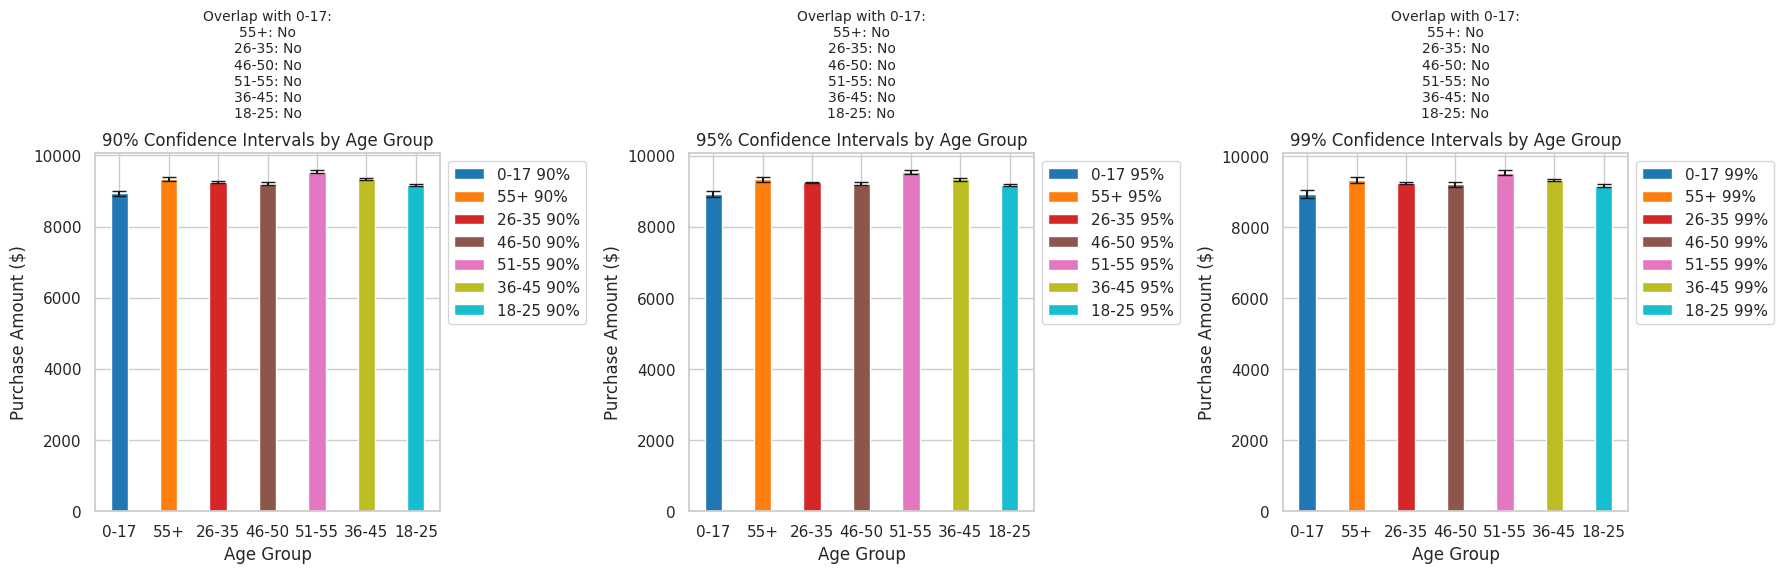

In [89]:
# Function to check overlap
def check_ci_overlap(ci1, ci2):
    return not (ci1[1] < ci2[0] or ci2[1] < ci1[0])

# Calculate overlaps for each level
overlaps = {}
reference_group = '0-17'  # Replace with your reference age group
for level in ['90%', '95%', '99%']:
    overlaps[level] = {
        age_group: check_ci_overlap(confidence_intervals[reference_group][f"{level} CI"], confidence_intervals[age_group][f"{level} CI"])
        for age_group in age_groups if age_group != reference_group
    }

# Visualization with updated colors for age groups
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
width = 0.35  # the width of the bars

for i, level in enumerate(['90%', '95%', '99%']):
    for j, age_group in enumerate(confidence_intervals.keys()):
        mean = confidence_intervals[age_group]['Mean']
        ci = confidence_intervals[age_group][f"{level} CI"]
        error = [(mean - ci[0], ci[1] - mean)]
        color = colors[age_group]
        axes[i].bar(j, mean, width, yerr=np.array(error).T, label=f'{age_group} {level}', color=color, capsize=5)
        axes[i].set_title(f'{level} Confidence Intervals by Age Group')
        axes[i].set_xticks(np.arange(len(confidence_intervals.keys())))
        axes[i].set_xticklabels(list(confidence_intervals.keys()))
        axes[i].set_xlabel('Age Group')
        axes[i].set_ylabel('Purchase Amount ($)')
        axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

    # Add overlap information to the top of each plot
    overlap_text = "\n".join([f"{group}: {'Yes' if overlaps[level][group] else 'No'}"
                              for group in overlaps[level]])
    axes[i].annotate(f"Overlap with {reference_group}:\n{overlap_text}",
                     xy=(0.5, 1.1), xycoords='axes fraction', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


#### **Insights on Spending Patterns Across Age Groups**

###### **Higher Spending with Age (51-55)**  
- The **51-55 age group** shows the **highest mean spending** at approximately **$9534.81**, reflecting increased financial ability or willingness to spend as age increases.  
- Their **99% confidence interval** ranges from **\$9468.02 to \$9601.60**, indicating a relatively **stable spending pattern** with less variability.  

###### **Youngest Shoppers (0-17)**  
- The **0-17 age group** has the **lowest mean spending** at around **$8933.46**, likely due to limited purchasing power or dependency on guardians.  
- Their **99% confidence interval** is the widest (**\$8826.32 to \$9040.61**), suggesting greater **variability** in spending among the youngest shoppers.  

###### **Middle-aged Stability (36-45)**  
- Individuals in the **36-45 age group** have a mean spending of **$9331.35**, placing them in the **upper tier of spenders**.  
- Their **95% confidence interval** (**\$9301.67 to \$9361.03**) highlights **consistent spending habits**, likely due to settled personal and professional lives.  

###### **Consistency in Older Age (55+)**  
- The **55+ age group** has a relatively **high mean spending** of **$9336.28**, likely supported by more disposable income or savings.  
- Their **narrow confidence intervals** across the 90%, 95%, and 99% levels (e.g., **99% CI: \$9248.24 to \$9424.32**) demonstrate **consistency** and less fluctuation in spending patterns.  

###### **Young Adults (18-25) Showing Caution**  
- The **18-25 age group** has a mean spending of **\$9169.66**, reflecting careful spending influenced by early career earnings or education expenses.  
- Their confidence intervals are moderately wide (e.g., **99% CI: \$9128.59 to $9210.74**), indicating **variability** due to a combination of limited budgets and diverse needs or wants.  


These insights provide a comprehensive understanding of spending behavior across **different life stages**, enabling targeted **marketing strategies**, **product placements**, and **promotional offers** tailored to each age group's spending habits.


##### **Part 3: How Can Walmart Leverage This Conclusion?**

###### **Age-Targeted Marketing**  
- **a. Develop marketing campaigns** tailored to the preferences of each age group.  
- **b. Use digital marketing** to reach younger customers and traditional media for older demographics.  
- **c. Highlight products and promotions** that resonate with specific **age-related interests and needs**.  

###### **Product Assortment and Placement**  
- **a. Adjust inventory and product placements** based on the purchasing trends of each age group.  
- **b. Feature age-appropriate products** prominently in both online platforms and physical stores.  
- **c. Create seasonal and event-driven promotions** targeting the spending habits observed in different age groups.  

###### **Dynamic Pricing Strategies**  
- **a. Implement pricing strategies** that cater to the **budget ranges** identified in different age groups.  
- **b. Offer age-specific discounts** to attract and retain a diverse customer base.  
- **c. Use loyalty programs** to incentivize higher spending within age groups that show **variable purchasing patterns**.  

###### **Customized Shopping Experiences**  
- **a. Design store layouts and online interfaces** that cater to the accessibility needs of different ages.  
- **b. Introduce technology-assisted shopping tools** for tech-savvy younger consumers and personalized assistance for older customers.  
- **c. Optimize the customer journey** on e-commerce platforms to match the shopping behaviors and preferences of each age group.  

###### **Strategic Store Operations**  
- **a. Analyze foot traffic and online engagement data** to optimize store hours and staffing according to **age group activity peaks**.  
- **b. Train staff** to recognize and respond to the needs of different age demographics.  
- **c. Enhance in-store and online customer support services** tailored to specific age groups, improving **overall customer experience** and satisfaction.  


By executing these strategies, Walmart can effectively align its **business operations** with the **diverse needs and preferences** of its customer base across different age groups, ensuring improved **engagement**, **satisfaction**, and **sales performance**.


---

## **5. Final Insights**

#### **Comments on the Distribution of Variables and Relationships Between Them**

###### **Variable Distribution:**  
- **Gender:** Predominantly male purchasers, potentially skewing spending patterns and purchase behavior analyses.  
- **Age:** Concentrated in the **26-35 range**, reflecting a demographic active in consumption, particularly in **tech** and **fashion trends**.  
- **Occupation:** Wide spread across various occupations, indicating diversity in **professional backgrounds** and **disposable incomes**.  
- **City Category:** Varied distribution across city tiers, suggesting **regional disparities** in purchasing power and market penetration.  
- **Marital Status:** Balanced representation of **single** and **married individuals**, offering insights into both **family-oriented** and **individual consumer behavior**.  

###### **Relationships Between Variables:**  
- **Age and Purchase:** Younger demographics might have **lower average purchases**, but **high variability** suggests significant discretionary spending.  
- **Gender and Purchase:** Males tend to have **higher mean purchases**, potentially due to **product preferences** or **spending power**.  
- **Marital Status and Purchase:** Minor differences in spending, indicating that **marital status** alone doesn't significantly dictate purchasing patterns.  
- **Occupation and City Category:** Possible correlations may reveal how **urbanization** impacts **employment sectors** and **consumer spending**.

</br>

#### **Comments for Each Univariate and Bivariate Plot**

###### **Univariate Plots:**  
- **Histograms of Age and Purchase:** Highlight customer age distributions and spending patterns, identifying key spending groups and their financial engagement.  
- **Bar Charts of Gender and Purchase:** Show spending differences between genders, useful for developing **targeted marketing strategies**.  

###### **Bivariate Plots:**  
- **Scatter Plots of Age vs. Purchase:** Indicate trends in how certain age groups concentrate their spending on specific product ranges.  
- **Box Plots of Occupation vs. Purchase:** Highlight if certain occupational groups exhibit **higher spending habits**, guiding personalized promotions.

</br>

#### **Comments on Different Variables When Generalizing for Population**

###### **Gender:**  
- **Insight:** Men tend to spend more on average, suggesting a preference for **higher-priced** or **luxury items**.  
- **Generalization:** Marketers can develop **gender-specific strategies**, adjusting product lines and promotions to cater to male spending habits.  

###### **Age:**  
- **Insight:** Younger individuals, particularly those under **35**, are active buyers but show **wide spending variability**, reflecting diverse needs and financial capabilities.  
- **Generalization:** Implement **age-specific marketing** and product offerings tailored to **lifestyle** and **life stage needs**, enhancing engagement.  

###### **Occupation:**  
- **Insight:** Spending patterns vary across occupational categories, reflecting economic diversity.  
- **Generalization:** Develop **occupation-based marketing** to offer targeted promotions that resonate with professional and economic statuses.  

###### **City Category:**  
- **Insight:** Spending power varies by city tier, with potentially higher spending in **upper-tier cities**.  
- **Generalization:** Tailor **store layouts**, **inventory**, and **promotions** to align with **city-specific demographics**, optimizing sales and customer satisfaction.


These insights provide a comprehensive foundation for developing **strategic initiatives** aimed at:  
- Boosting **customer engagement**  
- Enhancing **sales efficiency**  
- Catering to diverse demographic segments effectively  
By leveraging data-driven strategies, Walmart can optimize its operations to better serve its diverse customer base.


---

## **6. Recommendations**

#### **Gender-Specific Marketing**  
- **Women:** Launch campaigns promoting **affordable, everyday products** to encourage increased spending.  
- **Men:** Focus on **premium product promotions** that align with their **higher spending habits**.  

#### **Age-Targeted Strategies**  
- **Young Adults (18-25):** Introduce **discounts** and **tech-forward products** suited to their lifestyle and budget.  
- **Middle-Aged (36-50):** Offer **premium, family-oriented products** that reflect their stable financial situation.  
- **Seniors (55+):** Provide **easy-access shopping solutions** and **health-related products** tailored to their needs.  

#### **Marital Status Offers**  
- **Singles:** Promote **bundles** and **trendy, individual-use products** to meet their preferences.  
- **Married:** Focus on **bulk buying options** and **home essentials** that deliver value for money.  

#### **Seasonal Promotions**  
- Strategically align marketing campaigns with **major shopping seasons** to capitalize on spending patterns and maximize revenue.  

#### **Loyalty Programs**  
- Develop a **tiered loyalty system** to reward **repeat purchases**, increasing spending frequency and amounts across all demographics.  

#### **Product Placement**  
- Optimize **store layouts** and **online product placement** to enhance **visibility** and **accessibility** of popular products and categories identified in data insights.  

#### **Customer Feedback Loop**  
- Implement a **robust feedback system** to gather insights directly from customers, allowing for continuous improvement of product offerings and services.  

#### **Staff Training**  
- Invest in **customer service training** to equip staff with the skills to understand and meet the diverse needs of customers based on demographic profiles.  

#### **Digital Integration**  
- Enhance the **online shopping experience** with **personalized recommendations** and **user-friendly interfaces** tailored to different customer segments.  

#### **Community Engagement**  
- Host **community events** and build partnerships that resonate with target demographics to foster **brand loyalty** and **trust**.  


These straightforward strategies are designed to align all levels of business operations towards enhancing **customer satisfaction** and **driving sales**, ensuring both **short-term gains** and **long-term growth**.


---

### *Created by* ***Rishabh Dev Sahu*** ✨